In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import seaborn as sns
from matplotlib import rcParams
import matplotlib as mpl
import datetime as dt

In [41]:
#conda update --force-reinstall pandas

In [42]:
#Import data file
df = pd.read_csv('Input File/201912-citibike-tripdata.csv')

In [43]:
#Check data frame
df.head()

tripduration                 starttime                  stoptime  \
0           602  2019-12-01 00:00:05.5640  2019-12-01 00:10:07.8180   
1          1206  2019-12-01 00:00:10.9630  2019-12-01 00:20:17.8820   
2           723  2019-12-01 00:00:11.8180  2019-12-01 00:12:14.8310   
3           404  2019-12-01 00:00:12.2200  2019-12-01 00:06:56.8860   
4          1059  2019-12-01 00:00:14.7230  2019-12-01 00:17:54.1860   

   start station id      start station name  start station latitude  \
0              3382   Carroll St & Smith St               40.680611   
1               362      Broadway & W 37 St               40.751726   
2               146    Hudson St & Reade St               40.716250   
3              3834  Irving Ave & Halsey St               40.694670   
4               500      Broadway & W 51 St               40.762288   

   start station longitude  end station id              end station name  \
0               -73.994758            3304                  6 Ave & 9 St   
1               -73.987535             500            Broadway & W 51 St   
2               -74.009106             238       Bank St & Washington St   
3               -73.906630            3827          Halsey St & Broadway   
4               -73.983362            3323  W 106 St & Central Park West   

   end station latitude  end station longitude  bikeid    usertype  \
0             40.668127             -73.983776   41932  Subscriber   
1             40.762288             -73.983362   18869    Customer   
2             40.736197             -74.008592   15334  Subscriber   
3             40.685650             -73.915640   41692    Customer   
4             40.798186             -73.960591   40156  Subscriber   

   birth year  gender  
0        1970       1  
1        1999       1  
2        1997       1  
3        1995       1  
4        1961       1

In [44]:
split=df.starttime.str.split(' ', expand=True)
df['start_date']=split[0]
df['start_time']=split[1]
split2=df.stoptime.str.split(' ', expand=True)
df['end_date']=split2[0]
df['end_time']=split2[1]

In [45]:
#Check percentage of missing data in the dataset
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data(df)

Total  Percent
end_time                     0      0.0
end station name             0      0.0
starttime                    0      0.0
stoptime                     0      0.0
start station id             0      0.0
start station name           0      0.0
start station latitude       0      0.0
start station longitude      0      0.0
end station id               0      0.0
end station latitude         0      0.0
end_date                     0      0.0
end station longitude        0      0.0
bikeid                       0      0.0
usertype                     0      0.0
birth year                   0      0.0
gender                       0      0.0
start_date                   0      0.0
start_time                   0      0.0
tripduration                 0      0.0

In [46]:
#Drop missing values 
df.dropna(inplace = True)

In [47]:
#Convert variables to the correct data format types
df['starttime'] = to_datetime(df['starttime'])
df['stoptime'] = to_datetime(df['stoptime'])
df['start station name'] = df['start station name'].astype('category')
df['end station name'] = df['end station name'].astype('category')
df['usertype'] = df['usertype'].astype('category')
df['gender'] = df['gender'].astype('category')
round(df.describe())


tripduration  start station id  start station latitude  \
count      955210.0          955210.0                955210.0   
mean          831.0            1667.0                    41.0   
std         10786.0            1493.0                     0.0   
min            61.0              72.0                    41.0   
25%           320.0             380.0                    41.0   
50%           522.0             509.0                    41.0   
75%           876.0            3311.0                    41.0   
max       3304262.0            3911.0                    41.0   

       start station longitude  end station id  end station latitude  \
count                 955210.0        955210.0              955210.0   
mean                     -74.0          1647.0                  41.0   
std                        0.0          1491.0                   0.0   
min                      -74.0            72.0                  41.0   
25%                      -74.0           379.0                  41.0   
50%                      -74.0           507.0                  41.0   
75%                      -74.0          3307.0                  41.0   
max                      -74.0          3911.0                  41.0   

       end station longitude    bikeid  birth year  
count               955210.0  955210.0    955210.0  
mean                   -74.0   32916.0      1979.0  
std                      0.0    7997.0        13.0  
min                    -74.0   14529.0      1885.0  
25%                    -74.0   28716.0      1969.0  
50%                    -74.0   34101.0      1982.0  
75%                    -74.0   39839.0      1990.0  
max                    -74.0   42046.0      2003.0

In [48]:
#Check the data format to ensure changes have been made per above
df.dtypes

tripduration                        int64
starttime                  datetime64[ns]
stoptime                   datetime64[ns]
start station id                    int64
start station name               category
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                 category
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                         category
birth year                          int64
gender                           category
start_date                         object
start_time                         object
end_date                           object
end_time                           object
dtype: object

In [49]:
#Rename columns in data frame
df.columns = [j.replace(' ', '_') for j in df.columns]

In [50]:
df.head()

tripduration               starttime                stoptime  \
0           602 2019-12-01 00:00:05.564 2019-12-01 00:10:07.818   
1          1206 2019-12-01 00:00:10.963 2019-12-01 00:20:17.882   
2           723 2019-12-01 00:00:11.818 2019-12-01 00:12:14.831   
3           404 2019-12-01 00:00:12.220 2019-12-01 00:06:56.886   
4          1059 2019-12-01 00:00:14.723 2019-12-01 00:17:54.186   

   start_station_id      start_station_name  start_station_latitude  \
0              3382   Carroll St & Smith St               40.680611   
1               362      Broadway & W 37 St               40.751726   
2               146    Hudson St & Reade St               40.716250   
3              3834  Irving Ave & Halsey St               40.694670   
4               500      Broadway & W 51 St               40.762288   

   start_station_longitude  end_station_id              end_station_name  \
0               -73.994758            3304                  6 Ave & 9 St   
1               -73.987535             500            Broadway & W 51 St   
2               -74.009106             238       Bank St & Washington St   
3               -73.906630            3827          Halsey St & Broadway   
4               -73.983362            3323  W 106 St & Central Park West   

   end_station_latitude  end_station_longitude  bikeid    usertype  \
0             40.668127             -73.983776   41932  Subscriber   
1             40.762288             -73.983362   18869    Customer   
2             40.736197             -74.008592   15334  Subscriber   
3             40.685650             -73.915640   41692    Customer   
4             40.798186             -73.960591   40156  Subscriber   

   birth_year gender  start_date     start_time    end_date       end_time  
0        1970      1  2019-12-01  00:00:05.5640  2019-12-01  00:10:07.8180  
1        1999      1  2019-12-01  00:00:10.9630  2019-12-01  00:20:17.8820  
2        1997      1  2019-12-01  00:00:11.8180  2019-12-01  00:12:14.8310  
3        1995      1  2019-12-01  00:00:12.2200  2019-12-01  00:06:56.8860  
4        1961      1  2019-12-01  00:00:14.7230  2019-12-01  00:17:54.1860

In [51]:
#Filter data to a specific week in December

start_date = '15-12-2019'
end_date = '22-12-2019'
mask = (df['starttime'] >= start_date) & (df['starttime'] <= end_date)
df_filtered = df.loc[mask]
df_filtered

tripduration               starttime                stoptime  \
487263          1070 2019-12-15 00:00:01.529 2019-12-15 00:17:51.919   
487264          1756 2019-12-15 00:00:10.100 2019-12-15 00:29:27.096   
487265           230 2019-12-15 00:00:12.226 2019-12-15 00:04:03.125   
487266           686 2019-12-15 00:00:16.385 2019-12-15 00:11:42.665   
487267          1770 2019-12-15 00:00:21.888 2019-12-15 00:29:52.244   
487268           605 2019-12-15 00:00:24.068 2019-12-15 00:10:29.975   
487269           492 2019-12-15 00:00:27.733 2019-12-15 00:08:40.467   
487270           888 2019-12-15 00:00:30.090 2019-12-15 00:15:18.872   
487271           298 2019-12-15 00:00:36.061 2019-12-15 00:05:34.622   
487272           186 2019-12-15 00:00:37.232 2019-12-15 00:03:43.822   
487273           545 2019-12-15 00:00:40.565 2019-12-15 00:09:45.664   
487274          1789 2019-12-15 00:00:42.535 2019-12-15 00:30:32.049   
487275           171 2019-12-15 00:00:48.053 2019-12-15 00:03:39.791   
487276           695 2019-12-15 00:00:54.109 2019-12-15 00:12:29.959   
487277          1693 2019-12-15 00:01:00.742 2019-12-15 00:29:14.407   
487278           722 2019-12-15 00:01:01.606 2019-12-15 00:13:04.111   
487279           622 2019-12-15 00:01:05.727 2019-12-15 00:11:27.895   
487280          1224 2019-12-15 00:01:06.634 2019-12-15 00:21:30.791   
487281           673 2019-12-15 00:01:11.205 2019-12-15 00:12:24.619   
487282           242 2019-12-15 00:01:14.954 2019-12-15 00:05:17.304   
487283           477 2019-12-15 00:01:18.800 2019-12-15 00:09:16.577   
487284          1207 2019-12-15 00:01:22.188 2019-12-15 00:21:30.050   
487285           871 2019-12-15 00:01:22.550 2019-12-15 00:15:54.355   
487286          1051 2019-12-15 00:01:29.366 2019-12-15 00:19:01.234   
487287           258 2019-12-15 00:01:41.010 2019-12-15 00:05:59.705   
487288           266 2019-12-15 00:01:41.068 2019-12-15 00:06:08.066   
487289          1684 2019-12-15 00:01:45.060 2019-12-15 00:29:49.731   
487290          1605 2019-12-15 00:01:46.266 2019-12-15 00:28:31.587   
487291          1003 2019-12-15 00:01:51.206 2019-12-15 00:18:35.115   
487292          1397 2019-12-15 00:01:52.391 2019-12-15 00:25:09.978   
...              ...                     ...                     ...   
707944           985 2019-12-21 23:54:52.062 2019-12-22 00:11:17.266   
707945           983 2019-12-21 23:54:55.869 2019-12-22 00:11:19.290   
707946          1873 2019-12-21 23:55:12.447 2019-12-22 00:26:25.525   
707947           335 2019-12-21 23:55:38.688 2019-12-22 00:01:14.037   
707948           520 2019-12-21 23:55:41.969 2019-12-22 00:04:22.642   
707949           975 2019-12-21 23:55:55.966 2019-12-22 00:12:11.640   
707950          1204 2019-12-21 23:55:57.119 2019-12-22 00:16:01.620   
707951           654 2019-12-21 23:56:05.710 2019-12-22 00:07:00.296   
707952          1122 2019-12-21 23:56:06.882 2019-12-22 00:14:49.058   
707953          1339 2019-12-21 23:56:14.297 2019-12-22 00:18:33.756   
707954          1781 2019-12-21 23:56:25.751 2019-12-22 00:26:06.876   
707955           517 2019-12-21 23:56:28.977 2019-12-22 00:05:06.501   
707956           779 2019-12-21 23:56:29.917 2019-12-22 00:09:29.414   
707957           276 2019-12-21 23:56:35.142 2019-12-22 00:01:11.295   
707958           312 2019-12-21 23:56:50.376 2019-12-22 00:02:02.723   
707959           545 2019-12-21 23:56:52.740 2019-12-22 00:05:58.116   
707960           375 2019-12-21 23:56:56.003 2019-12-22 00:03:11.370   
707961          1250 2019-12-21 23:56:59.678 2019-12-22 00:17:49.982   
707962           569 2019-12-21 23:57:09.319 2019-12-22 00:06:38.323   
707963          1043 2019-12-21 23:57:13.784 2019-12-22 00:14:36.877   
707964           605 2019-12-21 23:57:55.834 2019-12-22 00:08:01.197   
707965           382 2019-12-21 23:57:57.144 2019-12-22 00:04:20.021   
707966          3350 2019-12-21 23:58:16.114 2019-12-22 00:54:06.757   
707967           237 2019-12-21 23:58:19.323 201

In [52]:
#Exclude bike trips that record trip duration as <90s and which start station & end station is the same. 
#This takes care of faulty bikes that users may have picked up, then realised that they were faulty and returned them back to the same station, typically within 90s.
df = df_filtered.drop(df_filtered.index[(df_filtered['tripduration'] < 90) & 
                          (df_filtered['start_station_latitude'] == df_filtered['start_station_latitude'])])

In [53]:
#Add Minutes column for Trip Duration
df['tripduration_minutes'] = df['tripduration']/60
#For Visual purposes, rounded
df['tripduration_minutes'] = round(df['tripduration_minutes'])
df['tripduration_minutes'] = df['tripduration_minutes'].astype(int)

df

tripduration               starttime                stoptime  \
487263          1070 2019-12-15 00:00:01.529 2019-12-15 00:17:51.919   
487264          1756 2019-12-15 00:00:10.100 2019-12-15 00:29:27.096   
487265           230 2019-12-15 00:00:12.226 2019-12-15 00:04:03.125   
487266           686 2019-12-15 00:00:16.385 2019-12-15 00:11:42.665   
487267          1770 2019-12-15 00:00:21.888 2019-12-15 00:29:52.244   
487268           605 2019-12-15 00:00:24.068 2019-12-15 00:10:29.975   
487269           492 2019-12-15 00:00:27.733 2019-12-15 00:08:40.467   
487270           888 2019-12-15 00:00:30.090 2019-12-15 00:15:18.872   
487271           298 2019-12-15 00:00:36.061 2019-12-15 00:05:34.622   
487272           186 2019-12-15 00:00:37.232 2019-12-15 00:03:43.822   
487273           545 2019-12-15 00:00:40.565 2019-12-15 00:09:45.664   
487274          1789 2019-12-15 00:00:42.535 2019-12-15 00:30:32.049   
487275           171 2019-12-15 00:00:48.053 2019-12-15 00:03:39.791   
487276           695 2019-12-15 00:00:54.109 2019-12-15 00:12:29.959   
487277          1693 2019-12-15 00:01:00.742 2019-12-15 00:29:14.407   
487278           722 2019-12-15 00:01:01.606 2019-12-15 00:13:04.111   
487279           622 2019-12-15 00:01:05.727 2019-12-15 00:11:27.895   
487280          1224 2019-12-15 00:01:06.634 2019-12-15 00:21:30.791   
487281           673 2019-12-15 00:01:11.205 2019-12-15 00:12:24.619   
487282           242 2019-12-15 00:01:14.954 2019-12-15 00:05:17.304   
487283           477 2019-12-15 00:01:18.800 2019-12-15 00:09:16.577   
487284          1207 2019-12-15 00:01:22.188 2019-12-15 00:21:30.050   
487285           871 2019-12-15 00:01:22.550 2019-12-15 00:15:54.355   
487286          1051 2019-12-15 00:01:29.366 2019-12-15 00:19:01.234   
487287           258 2019-12-15 00:01:41.010 2019-12-15 00:05:59.705   
487288           266 2019-12-15 00:01:41.068 2019-12-15 00:06:08.066   
487289          1684 2019-12-15 00:01:45.060 2019-12-15 00:29:49.731   
487290          1605 2019-12-15 00:01:46.266 2019-12-15 00:28:31.587   
487291          1003 2019-12-15 00:01:51.206 2019-12-15 00:18:35.115   
487292          1397 2019-12-15 00:01:52.391 2019-12-15 00:25:09.978   
...              ...                     ...                     ...   
707944           985 2019-12-21 23:54:52.062 2019-12-22 00:11:17.266   
707945           983 2019-12-21 23:54:55.869 2019-12-22 00:11:19.290   
707946          1873 2019-12-21 23:55:12.447 2019-12-22 00:26:25.525   
707947           335 2019-12-21 23:55:38.688 2019-12-22 00:01:14.037   
707948           520 2019-12-21 23:55:41.969 2019-12-22 00:04:22.642   
707949           975 2019-12-21 23:55:55.966 2019-12-22 00:12:11.640   
707950          1204 2019-12-21 23:55:57.119 2019-12-22 00:16:01.620   
707951           654 2019-12-21 23:56:05.710 2019-12-22 00:07:00.296   
707952          1122 2019-12-21 23:56:06.882 2019-12-22 00:14:49.058   
707953          1339 2019-12-21 23:56:14.297 2019-12-22 00:18:33.756   
707954          1781 2019-12-21 23:56:25.751 2019-12-22 00:26:06.876   
707955           517 2019-12-21 23:56:28.977 2019-12-22 00:05:06.501   
707956           779 2019-12-21 23:56:29.917 2019-12-22 00:09:29.414   
707957           276 2019-12-21 23:56:35.142 2019-12-22 00:01:11.295   
707958           312 2019-12-21 23:56:50.376 2019-12-22 00:02:02.723   
707959           545 2019-12-21 23:56:52.740 2019-12-22 00:05:58.116   
707960           375 2019-12-21 23:56:56.003 2019-12-22 00:03:11.370   
707961          1250 2019-12-21 23:56:59.678 2019-12-22 00:17:49.982   
707962           569 2019-12-21 23:57:09.319 2019-12-22 00:06:38.323   
707963          1043 2019-12-21 23:57:13.784 2019-12-22 00:14:36.877   
707964           605 2019-12-21 23:57:55.834 2019-12-22 00:08:01.197   
707965           382 2019-12-21 23:57:57.144 2019-12-22 00:04:20.021   
707966          3350 2019-12-21 23:58:16.114 2019-12-22 00:54:06.757   
707967           237 2019-12-21 23:58:19.323 201

Text(0, 0.5, 'Trip Counts')

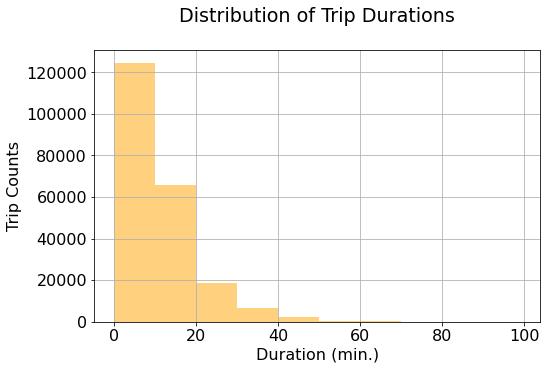

In [54]:
# Plot the distribution of trip durations
plt.rcParams.update({'font.size': 16})
df['tripduration_minutes'].hist(figsize = (8,5), bins=[0,10,20,30,40,50,60,70,80,90,99], alpha = 0.5, color = 'orange')
plt.title('Distribution of Trip Durations\n')
plt.xlabel('Duration (min.)')
plt.ylabel('Trip Counts')

In [55]:
#Exclude bike trips that register trip duration longer than 60 minutes. 
#As seen from above histogram, very few trips register duration longer than 60 minutes. 
#Any trip which lasts longer than 1 hours 3600 seconds probably indicates a stolen bike, an anomaly, or incorrect docking of the bike.
df = df.drop(df.index[(df['tripduration_minutes'] > 60)])
df

tripduration               starttime                stoptime  \
487263          1070 2019-12-15 00:00:01.529 2019-12-15 00:17:51.919   
487264          1756 2019-12-15 00:00:10.100 2019-12-15 00:29:27.096   
487265           230 2019-12-15 00:00:12.226 2019-12-15 00:04:03.125   
487266           686 2019-12-15 00:00:16.385 2019-12-15 00:11:42.665   
487267          1770 2019-12-15 00:00:21.888 2019-12-15 00:29:52.244   
487268           605 2019-12-15 00:00:24.068 2019-12-15 00:10:29.975   
487269           492 2019-12-15 00:00:27.733 2019-12-15 00:08:40.467   
487270           888 2019-12-15 00:00:30.090 2019-12-15 00:15:18.872   
487271           298 2019-12-15 00:00:36.061 2019-12-15 00:05:34.622   
487272           186 2019-12-15 00:00:37.232 2019-12-15 00:03:43.822   
487273           545 2019-12-15 00:00:40.565 2019-12-15 00:09:45.664   
487274          1789 2019-12-15 00:00:42.535 2019-12-15 00:30:32.049   
487275           171 2019-12-15 00:00:48.053 2019-12-15 00:03:39.791   
487276           695 2019-12-15 00:00:54.109 2019-12-15 00:12:29.959   
487277          1693 2019-12-15 00:01:00.742 2019-12-15 00:29:14.407   
487278           722 2019-12-15 00:01:01.606 2019-12-15 00:13:04.111   
487279           622 2019-12-15 00:01:05.727 2019-12-15 00:11:27.895   
487280          1224 2019-12-15 00:01:06.634 2019-12-15 00:21:30.791   
487281           673 2019-12-15 00:01:11.205 2019-12-15 00:12:24.619   
487282           242 2019-12-15 00:01:14.954 2019-12-15 00:05:17.304   
487283           477 2019-12-15 00:01:18.800 2019-12-15 00:09:16.577   
487284          1207 2019-12-15 00:01:22.188 2019-12-15 00:21:30.050   
487285           871 2019-12-15 00:01:22.550 2019-12-15 00:15:54.355   
487286          1051 2019-12-15 00:01:29.366 2019-12-15 00:19:01.234   
487287           258 2019-12-15 00:01:41.010 2019-12-15 00:05:59.705   
487288           266 2019-12-15 00:01:41.068 2019-12-15 00:06:08.066   
487289          1684 2019-12-15 00:01:45.060 2019-12-15 00:29:49.731   
487290          1605 2019-12-15 00:01:46.266 2019-12-15 00:28:31.587   
487291          1003 2019-12-15 00:01:51.206 2019-12-15 00:18:35.115   
487292          1397 2019-12-15 00:01:52.391 2019-12-15 00:25:09.978   
...              ...                     ...                     ...   
707944           985 2019-12-21 23:54:52.062 2019-12-22 00:11:17.266   
707945           983 2019-12-21 23:54:55.869 2019-12-22 00:11:19.290   
707946          1873 2019-12-21 23:55:12.447 2019-12-22 00:26:25.525   
707947           335 2019-12-21 23:55:38.688 2019-12-22 00:01:14.037   
707948           520 2019-12-21 23:55:41.969 2019-12-22 00:04:22.642   
707949           975 2019-12-21 23:55:55.966 2019-12-22 00:12:11.640   
707950          1204 2019-12-21 23:55:57.119 2019-12-22 00:16:01.620   
707951           654 2019-12-21 23:56:05.710 2019-12-22 00:07:00.296   
707952          1122 2019-12-21 23:56:06.882 2019-12-22 00:14:49.058   
707953          1339 2019-12-21 23:56:14.297 2019-12-22 00:18:33.756   
707954          1781 2019-12-21 23:56:25.751 2019-12-22 00:26:06.876   
707955           517 2019-12-21 23:56:28.977 2019-12-22 00:05:06.501   
707956           779 2019-12-21 23:56:29.917 2019-12-22 00:09:29.414   
707957           276 2019-12-21 23:56:35.142 2019-12-22 00:01:11.295   
707958           312 2019-12-21 23:56:50.376 2019-12-22 00:02:02.723   
707959           545 2019-12-21 23:56:52.740 2019-12-22 00:05:58.116   
707960           375 2019-12-21 23:56:56.003 2019-12-22 00:03:11.370   
707961          1250 2019-12-21 23:56:59.678 2019-12-22 00:17:49.982   
707962           569 2019-12-21 23:57:09.319 2019-12-22 00:06:38.323   
707963          1043 2019-12-21 23:57:13.784 2019-12-22 00:14:36.877   
707964           605 2019-12-21 23:57:55.834 2019-12-22 00:08:01.197   
707965           382 2019-12-21 23:57:57.144 2019-12-22 00:04:20.021   
707966          3350 2019-12-21 23:58:16.114 2019-12-22 00:54:06.757   
707967           237 2019-12-21 23:58:19.323 201

In [56]:
#Define type of trips by "Joy Ride" and "Journey"
df['ride_type'] = np.where(df['start_station_id']== df['end_station_id'], 'joy_ride', 'journey')

In [57]:
#Calculate the top 5 popular stations based on the highest number of starts
top5 = pd.DataFrame() 
top5['Station']=df['start_station_name'].value_counts().head().index
top5['Number of Starts']=df['start_station_name'].value_counts().head().values
top5['Station'] = top5['Station'].cat.remove_unused_categories()
top5['Station'] = top5['Station'].astype('object')
#top5.sort_values(by = 'Number of Starts', ascending = False)

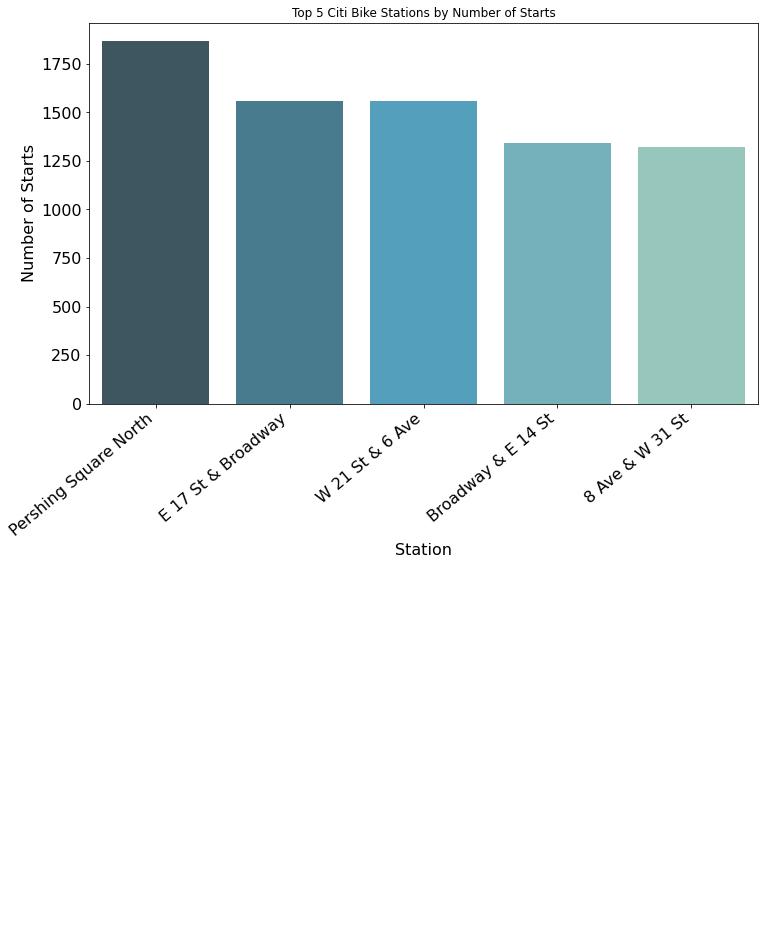

In [58]:
#Plot bar chart for the the Top 5 Stations based on number of starts
ax = sns.barplot('Station', 'Number of Starts', data = top5, palette="GnBu_d")
ax.set_title('Top 5 Citi Bike Stations by Number of Starts', fontsize = 12)
rcParams['figure.figsize'] = 12,7
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top5.iterrows():
    ax.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show()

In [59]:
#Add a new column calculating the number of trips between two stations, start and end.
trips_df = df.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'number_of_trips')
trips_df.sort_values('number_of_trips', ascending = False, inplace = True)
trips_df = trips_df.head(10)
trips_df

start_station_name               end_station_name  \
32804         E 7 St & Avenue A       Cooper Square & Astor Pl   
15032        Broadway & W 60 St               11 Ave & W 59 St   
27570        E 32 St & Park Ave                E 33 St & 1 Ave   
59650           W 21 St & 6 Ave                9 Ave & W 22 St   
1918           11 Ave & W 41 St                8 Ave & W 33 St   
32007         E 6 St & Avenue B       Cooper Square & Astor Pl   
20280  Cooper Square & Astor Pl              E 6 St & Avenue B   
56841  Vesey Pl & River Terrace  North Moore St & Greenwich St   
58850           W 17 St & 8 Ave               W 20 St & 11 Ave   
1584           10 Ave & W 28 St                W 26 St & 8 Ave   

       number_of_trips  
32804              109  
15032               96  
27570               90  
59650               87  
1918                77  
32007               72  
20280               70  
56841               69  
58850               68  
1584                68

In [60]:
#Add a column to dataframe to indicate the trip details 
trips_df['trip_detail'] = trips_df['start_station_name'].astype(str) + ' to ' + trips_df['end_station_name'].astype(str)
trips_df

start_station_name               end_station_name  \
32804         E 7 St & Avenue A       Cooper Square & Astor Pl   
15032        Broadway & W 60 St               11 Ave & W 59 St   
27570        E 32 St & Park Ave                E 33 St & 1 Ave   
59650           W 21 St & 6 Ave                9 Ave & W 22 St   
1918           11 Ave & W 41 St                8 Ave & W 33 St   
32007         E 6 St & Avenue B       Cooper Square & Astor Pl   
20280  Cooper Square & Astor Pl              E 6 St & Avenue B   
56841  Vesey Pl & River Terrace  North Moore St & Greenwich St   
58850           W 17 St & 8 Ave               W 20 St & 11 Ave   
1584           10 Ave & W 28 St                W 26 St & 8 Ave   

       number_of_trips                                        trip_detail  
32804              109      E 7 St & Avenue A to Cooper Square & Astor Pl  
15032               96             Broadway & W 60 St to 11 Ave & W 59 St  
27570               90              E 32 St & Park Ave to E 33 St & 1 Ave  
59650               87                 W 21 St & 6 Ave to 9 Ave & W 22 St  
1918                77                11 Ave & W 41 St to 8 Ave & W 33 St  
32007               72      E 6 St & Avenue B to Cooper Square & Astor Pl  
20280               70      Cooper Square & Astor Pl to E 6 St & Avenue B  
56841               69  Vesey Pl & River Terrace to North Moore St & G...  
58850               68                W 17 St & 8 Ave to W 20 St & 11 Ave  
1584                68                10 Ave & W 28 St to W 26 St & 8 Ave

Text(0, 0.5, 'Trip Detail')

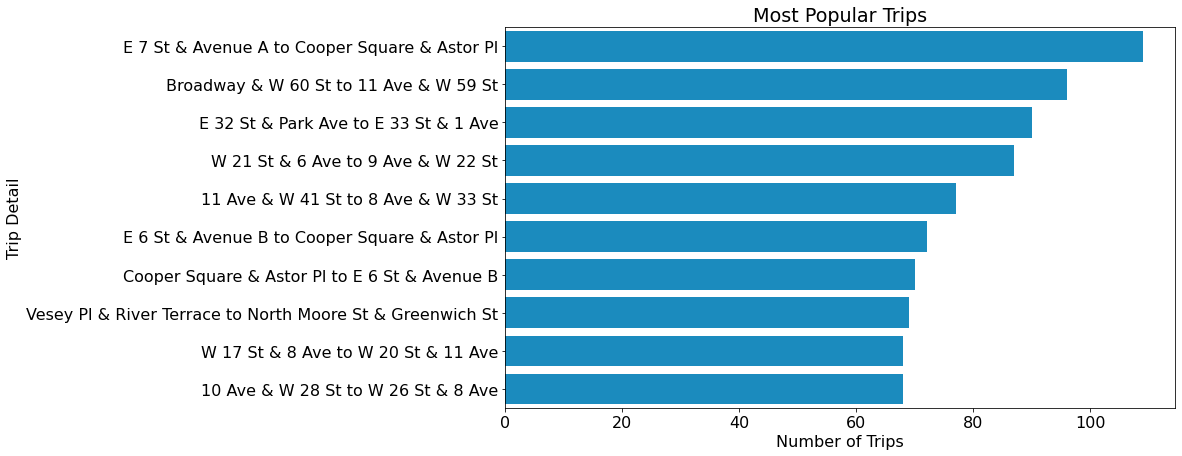

In [61]:
#Plot the most popular trips
plot2 = sns.barplot(data = trips_df
            ,x = 'number_of_trips'
            ,y = 'trip_detail',color = '#0095d9',
            ).set_title('Most Popular Trips')
plt.xlabel('Number of Trips')
plt.ylabel('Trip Detail')

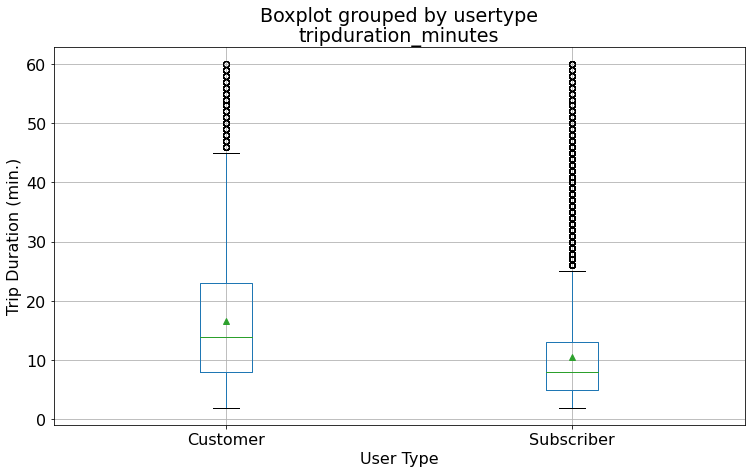

In [62]:
#Plot Box plot of Trip Duration, in minutes by User Type
df.boxplot('tripduration_minutes', by = 'usertype', showmeans=True)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (min.)')
plt.show()

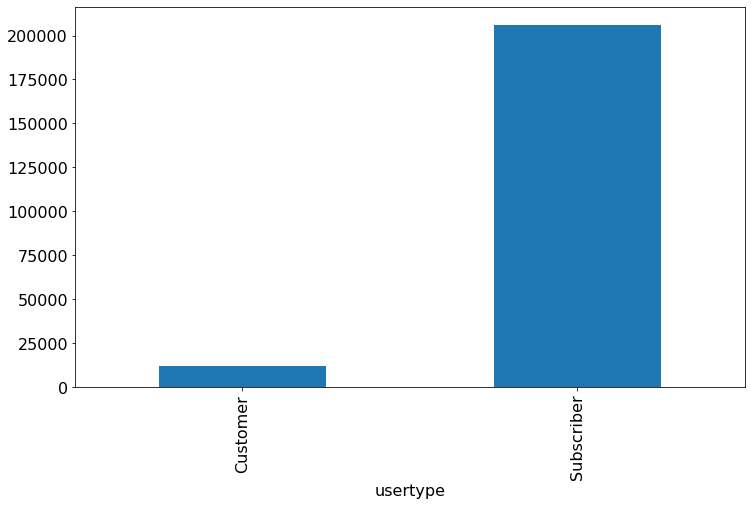

In [63]:
cust_df = df['tripduration_minutes'].groupby(df['usertype']).count()
cust_df.plot.bar()

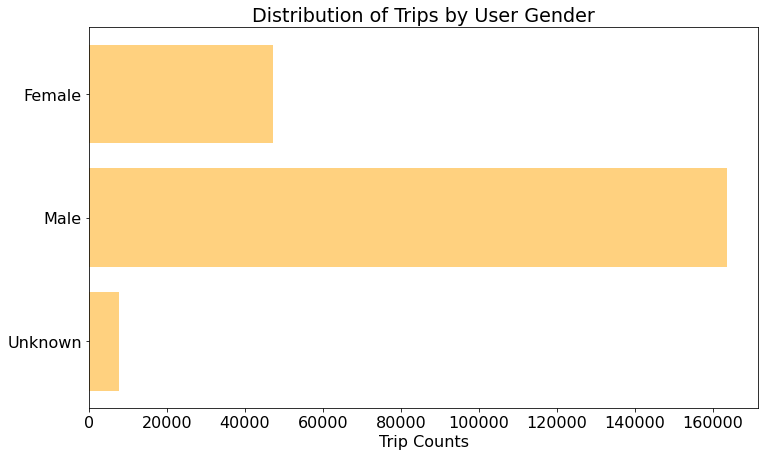

In [64]:
#Plot distribution of trips by gender
genders = ['Unknown', 'Male', 'Female']
y_pos = [0, 1, 2]
trip_counts = df.groupby('gender')['gender'].count()
plt.rcParams.update({'font.size': 16})
plt.barh(y_pos, trip_counts, align = 'center', alpha = 0.5, color = 'orange')
plt.yticks(y_pos, genders)
plt.xlabel('Trip Counts')
plt.title('Distribution of Trips by User Gender')
plt.show()

In [65]:
#Drop unknown gender
#df = df.drop(df.index[(df['gender'] == 0)])

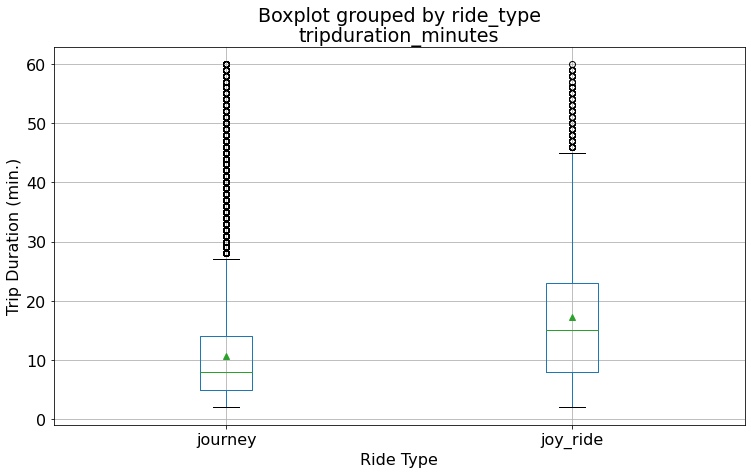

In [66]:
#Plot Box plot of Trip Duration, in minutes by Ride Type 
df.boxplot('tripduration_minutes', by = 'ride_type', showmeans=True)
plt.xlabel('Ride Type')
plt.ylabel('Trip Duration (min.)')
plt.show()

In [67]:
#Calculate Age
df['age'] = 2019 - df['birth_year']
df['age'] = df['age'].astype(int)

Text(0, 0.5, 'Count')

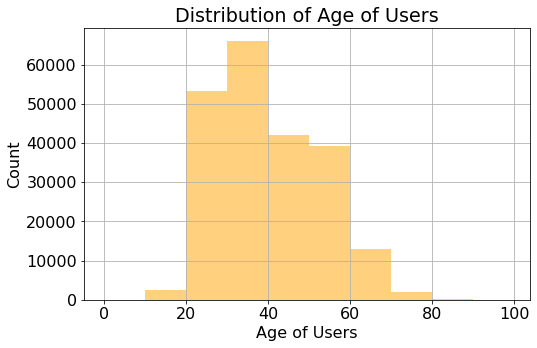

In [68]:
# Plot the distribution of age of users 
plt.rcParams.update({'font.size': 16})
df['age'].hist(figsize = (8,5), bins=[0,10,20,30,40,50,60,70,80,90,99], alpha = 0.5, color = 'orange')
plt.title('Distribution of Age of Users')
plt.xlabel('Age of Users')
plt.ylabel('Count')

In [69]:
# Calculate trip counts per hour on weekdays and weekends
df_sub = df.loc[:, ['tripduration', 'starttime']] # Keep only 'starttime' and 'tripduration' variables
# Index dataframe by 'datetime64' data in 'starttime' variable
df_sub.index = df_sub['starttime']
weekdays = df_sub[df_sub.index.weekday < 6]
weekends = df_sub[df_sub.index.weekday > 5]
weekdays_countsPerHr = weekdays.groupby(weekdays.index.hour).size()
weekends_countsPerHr = weekends.groupby(weekends.index.hour).size()

In [70]:

df['start_date']= pd.to_datetime(df['start_date'])
df['end_date']= pd.to_datetime(df['end_date'])
df['start_weekday']=df['start_date'].dt.weekday_name
rides_day=df['tripduration'].groupby(df['start_weekday']).count().sort_values(ascending=False)
rides_day

start_weekday
Monday       41291
Wednesday    37612
Friday       33869
Sunday       33367
Thursday     29149
Saturday     23951
Tuesday      19131
Name: tripduration, dtype: int64

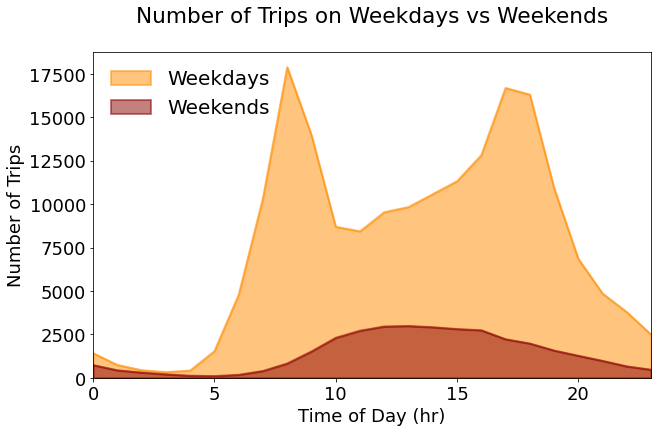

In [71]:
plt.rcParams.update({'font.size': 18, 'legend.fontsize': 20})
weekdays_countsPerHr.plot(kind = 'area', stacked = False, figsize = (10, 6), color = 'darkorange',
                          linewidth = 2, label='Weekdays')

weekends_countsPerHr.plot(kind = 'area', stacked = False, color = 'darkred',
                          linewidth = 2, label='Weekends')

plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax = plt.gca()
plt.title('Number of Trips on Weekdays vs Weekends\n')
plt.xlabel('Time of Day (hr)')
plt.ylabel('Number of Trips')
legend = ax.legend(loc='upper left', frameon = False)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


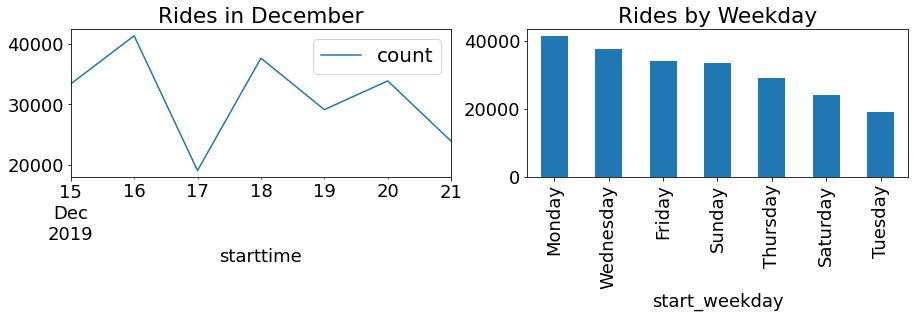

In [72]:
#Plot the number of trips recorded per day over the week
df.index = df['starttime']
countsPerDay = df.starttime.resample('D', how = ['count'])

fig=plt.figure()
ax=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)

countsPerDay.plot(ax=ax, figsize=(15,6),title='Rides in December')
rides_day.plot.bar(ax=ax1, figsize=(15,6),title='Rides by Weekday')

In [73]:
#Map trip count and duration according to start station
start_station = df.iloc[:,[3, 4, 5, 6]]
start_station.index = start_station['start_station_id']
start_station.head()

start_station_id        start_station_name  \
start_station_id                                               
3171                          3171   Amsterdam Ave & W 82 St   
471                            471   Grand St & Havemeyer St   
479                            479           9 Ave & W 45 St   
366                            366  Clinton Ave & Myrtle Ave   
2000                          2000  Front St & Washington St   

                  start_station_latitude  start_station_longitude  
start_station_id                                                   
3171                           40.785247               -73.976673  
471                            40.712868               -73.956981  
479                            40.760193               -73.991255  
366                            40.693261               -73.968896  
2000                           40.702551               -73.989402

In [74]:
start_station = start_station.drop_duplicates()
start_station.shape

(904, 4)

In [75]:
# Add trip counts and mean trip duration for each start station
count_start_station = df.groupby('start_station_id')['start_station_id'].count()
mean_start_station = df.groupby('start_station_id')['tripduration_minutes'].mean()
start_station['trip count'] = count_start_station
start_station['mean duration'] = mean_start_station
start_station.head()

start_station_id        start_station_name  \
start_station_id                                               
3171                          3171   Amsterdam Ave & W 82 St   
471                            471   Grand St & Havemeyer St   
479                            479           9 Ave & W 45 St   
366                            366  Clinton Ave & Myrtle Ave   
2000                          2000  Front St & Washington St   

                  start_station_latitude  start_station_longitude  trip count  \
start_station_id                                                                
3171                           40.785247               -73.976673         385   
471                            40.712868               -73.956981         203   
479                            40.760193               -73.991255         677   
366                            40.693261               -73.968896         346   
2000                           40.702551               -73.989402         251   

                  mean duration  
start_station_id                 
3171                  11.919481  
471                   11.635468  
479                   10.740030  
366                    9.523121  
2000                  14.270916

In [76]:
df

tripduration               starttime  \
starttime                                                       
2019-12-15 00:00:01.529          1070 2019-12-15 00:00:01.529   
2019-12-15 00:00:10.100          1756 2019-12-15 00:00:10.100   
2019-12-15 00:00:12.226           230 2019-12-15 00:00:12.226   
2019-12-15 00:00:16.385           686 2019-12-15 00:00:16.385   
2019-12-15 00:00:21.888          1770 2019-12-15 00:00:21.888   
2019-12-15 00:00:24.068           605 2019-12-15 00:00:24.068   
2019-12-15 00:00:27.733           492 2019-12-15 00:00:27.733   
2019-12-15 00:00:30.090           888 2019-12-15 00:00:30.090   
2019-12-15 00:00:36.061           298 2019-12-15 00:00:36.061   
2019-12-15 00:00:37.232           186 2019-12-15 00:00:37.232   
2019-12-15 00:00:40.565           545 2019-12-15 00:00:40.565   
2019-12-15 00:00:42.535          1789 2019-12-15 00:00:42.535   
2019-12-15 00:00:48.053           171 2019-12-15 00:00:48.053   
2019-12-15 00:00:54.109           695 2019-12-15 00:00:54.109   
2019-12-15 00:01:00.742          1693 2019-12-15 00:01:00.742   
2019-12-15 00:01:01.606           722 2019-12-15 00:01:01.606   
2019-12-15 00:01:05.727           622 2019-12-15 00:01:05.727   
2019-12-15 00:01:06.634          1224 2019-12-15 00:01:06.634   
2019-12-15 00:01:11.205           673 2019-12-15 00:01:11.205   
2019-12-15 00:01:14.954           242 2019-12-15 00:01:14.954   
2019-12-15 00:01:18.800           477 2019-12-15 00:01:18.800   
2019-12-15 00:01:22.188          1207 2019-12-15 00:01:22.188   
2019-12-15 00:01:22.550           871 2019-12-15 00:01:22.550   
2019-12-15 00:01:29.366          1051 2019-12-15 00:01:29.366   
2019-12-15 00:01:41.010           258 2019-12-15 00:01:41.010   
2019-12-15 00:01:41.068           266 2019-12-15 00:01:41.068   
2019-12-15 00:01:45.060          1684 2019-12-15 00:01:45.060   
2019-12-15 00:01:46.266          1605 2019-12-15 00:01:46.266   
2019-12-15 00:01:51.206          1003 2019-12-15 00:01:51.206   
2019-12-15 00:01:52.391          1397 2019-12-15 00:01:52.391   
...                               ...                     ...   
2019-12-21 23:54:52.062           985 2019-12-21 23:54:52.062   
2019-12-21 23:54:55.869           983 2019-12-21 23:54:55.869   
2019-12-21 23:55:12.447          1873 2019-12-21 23:55:12.447   
2019-12-21 23:55:38.688           335 2019-12-21 23:55:38.688   
2019-12-21 23:55:41.969           520 2019-12-21 23:55:41.969   
2019-12-21 23:55:55.966           975 2019-12-21 23:55:55.966   
2019-12-21 23:55:57.119          1204 2019-12-21 23:55:57.119   
2019-12-21 23:56:05.710           654 2019-12-21 23:56:05.710   
2019-12-21 23:56:06.882          1122 2019-12-21 23:56:06.882   
2019-12-21 23:56:14.297          1339 2019-12-21 23:56:14.297   
2019-12-21 23:56:25.751          1781 2019-12-21 23:56:25.751   
2019-12-21 23:56:28.977           517 2019-12-21 23:56:28.977   
2019-12-21 23:56:29.917           779 2019-12-21 23:56:29.917   
2019-12-21 23:56:35.142           276 2019-12-21 23:56:35.142   
2019-12-21 23:56:50.376           312 2019-12-21 23:56:50.376   
2019-12-21 23:56:52.740           545 2019-12-21 23:56:52.740   
2019-12-21 23:56:56.003           375 2019-12-21 23:56:56.003   
2019-12-21 23:56:59.678          1250 2019-12-21 23:56:59.678   
2019-12-21 23:57:09.319           569 2019-12-21 23:57:09.319   
2019-12-21 23:57:13.784          1043 2019-12-21 23:57:13.784   
2019-12-21 23:57:55.834           605 2019-12-21 23:57:55.834   
2019-12-21 23:57:57.144           382 2019-12-21 23:57:57.144   
2019-12-21 23:58:16.114          3350 2019-12-21 23:58:16.114   
2019-12-21 23:58:19.323           237 2019-12-21 23:58:19.323   
2019-12-21 23:58:35.101           265 2019-12-21 23:58:35.101   
2019-12-21 23:58:45.517           733 2019-12-21 23:58:45.517   
2019-12-21 23:59:26.487           227 2019-12-21 23:59:26.487   
2019-12-21 23:59:26.862           163 2019-12-21 23:59:26.862   
2019-12-21 23:59:30.936           516 2019-12-21 23:59:30.93

### Folium Maps for Observing Intensity of Trips through the Day

In [77]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [78]:
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

norm = Normalize(start_station['trip count'].min(), start_station['trip count'].max())
# Get dark tileset from CartoBD (https://cartodb.com/basemaps)
tileset = r'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'
start_station_map = folium.Map(location = [40.74, -73.99], width = 400, height = 600,
                             tiles = tileset,
                             attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                             zoom_start = 12)

for index, row in start_station.iterrows():
    color = rgb2hex(cm.YlOrRd(norm(row['trip count'])))
    folium.CircleMarker(location = [row['start_station_latitude'],
                                              row['start_station_longitude']],
                                  popup = row['start_station_name'],
                                  radius = row['mean duration'] / 10,
                                  color=color).add_to(start_station_map)
# Create the final html document
start_station_map.save('Folium_Output/start_station_map.html')

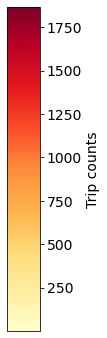

In [79]:
# Make a color scale bar
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (.5, 30))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(start_station['trip count'].min(), start_station['trip count'].max())

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = cmap, norm = norm, orientation = 'vertical')
cb1.set_label('Trip counts')

# Save as file
from pylab import *
savefig('Folium_Output/color_scale_start_station.png', bbox_inches = 'tight')

In [125]:
from IPython.display import IFrame
IFrame('Folium_Output/start_station_map.html', width = 400, height = 600)

In [81]:
#Map trip count and duration according to start station
end_station = df.iloc[:, [7, 8, 9, 10]]
end_station.index = end_station['end_station_id']
end_station.head()

end_station_id            end_station_name  \
end_station_id                                               
2006                      2006      Central Park S & 6 Ave   
3846                      3846     Central Ave & Himrod St   
478                        478            11 Ave & W 41 St   
3544                      3544  Underhill Ave & Pacific St   
3100                      3100      Nassau Ave & Newell St   

                end_station_latitude  end_station_longitude  
end_station_id                                               
2006                       40.765909             -73.976342  
3846                       40.696760             -73.923020  
478                        40.760301             -73.998842  
3544                       40.680484             -73.964680  
3100                       40.724813             -73.947526

In [82]:
end_station = end_station.drop_duplicates()
end_station.shape

(904, 4)

In [83]:
# Add trip counts and mean trip duration for each end station
count_end_station = df.groupby('end_station_id')['end_station_id'].count()
mean_end_station = df.groupby('end_station_id')['tripduration_minutes'].mean()
end_station['trip count'] = count_end_station
end_station['mean duration'] = mean_end_station
end_station.head()

end_station_id            end_station_name  \
end_station_id                                               
2006                      2006      Central Park S & 6 Ave   
3846                      3846     Central Ave & Himrod St   
478                        478            11 Ave & W 41 St   
3544                      3544  Underhill Ave & Pacific St   
3100                      3100      Nassau Ave & Newell St   

                end_station_latitude  end_station_longitude  trip count  \
end_station_id                                                            
2006                       40.765909             -73.976342         489   
3846                       40.696760             -73.923020          22   
478                        40.760301             -73.998842         700   
3544                       40.680484             -73.964680         114   
3100                       40.724813             -73.947526         176   

                mean duration  
end_station_id                 
2006                15.541922  
3846                15.681818  
478                 10.861429  
3544                 9.175439  
3100                10.607955

In [84]:
import folium
from matplotlib.colors import Normalize, rgb2hex
import matplotlib.cm as cm

norm = Normalize(end_station['trip count'].min(), end_station['trip count'].max())
# Get dark tileset from CartoBD (https://cartodb.com/basemaps)
tileset = r'http://{s}.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png'
end_station_map = folium.Map(location = [40.74, -73.99], width = 400, height = 600,
                             tiles = tileset,
                             attr = '&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>',
                             zoom_start = 12)

for index, row in end_station.iterrows():
    color = rgb2hex(cm.YlOrRd(norm(row['trip count'])))
    folium.CircleMarker(location = [row['end_station_latitude'],
                                              row['end_station_longitude']],
                                  popup = row['end_station_name'],
                                  radius = row['mean duration'] / 10,
                                  color = color, line_color = color).add_to(end_station_map)

end_station_map.save('Folium_Output/end_station_map.html')


In [126]:
from IPython.display import IFrame
IFrame('Folium_Output/end_station_map.html', width = 400, height = 600)

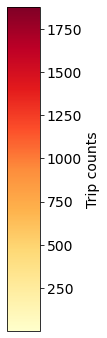

In [86]:
# Make a color scale bar
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize = (.5, 30))
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])

# Set the colormap and norm to correspond to the data
cmap = mpl.cm.YlOrRd
norm = mpl.colors.Normalize(end_station['trip count'].min(), end_station['trip count'].max())

cb1 = mpl.colorbar.ColorbarBase(ax1, cmap = cmap, norm = norm, orientation = 'vertical')
cb1.set_label('Trip counts')

# Save as file
from pylab import *
savefig('Folium_Output/color_scale_end_station.png', bbox_inches = 'tight')

In [87]:
#Show Hourly changes in start station use
# Index by 'datetime64' data in 'starttime' variable and get subset of weekdays
df.index = df['starttime']
weekdays = df[df.index.weekday < 6]
weekdays = weekdays.loc[weekdays.tripduration < 3600,:]

In [88]:
start_station = weekdays.iloc[:,[3, 4, 5, 6]]
start_station.index = start_station['start_station_id']
start_station = start_station.drop_duplicates()
start_station.shape

(903, 4)

In [89]:
# Loop through hourly subsets of the 'weekdays' dataFrame
# Calculate trip counts and mean duration for each station
# Add results to complete dataFrame and move on to next iteration
print('Calculating trip attributes for hourly subset:')
whole_day = pd.DataFrame()
for hour in range(24):
    print('... ' + str(hour) + ' hrs')
    subset = weekdays.loc[weekdays.starttime.dt.hour == hour,:]
    
    trip_count = subset.groupby('start_station_id')['start_station_id'].count()
    mean_duration = subset.groupby('start_station_id')['tripduration_minutes'].mean()
    
    start_station['trip count'] = trip_count
    start_station['mean duration'] = mean_duration
    start_station['hour'] = hour # Collect hour for easy subsetting below
    
    whole_day = pd.concat([whole_day, start_station], axis=0)

Calculating trip attributes for hourly subset:
... 0 hrs
... 1 hrs
... 2 hrs
... 3 hrs
... 4 hrs
... 5 hrs
... 6 hrs
... 7 hrs
... 8 hrs
... 9 hrs
... 10 hrs
... 11 hrs
... 12 hrs
... 13 hrs
... 14 hrs
... 15 hrs
... 16 hrs
... 17 hrs
... 18 hrs
... 19 hrs
... 20 hrs
... 21 hrs
... 22 hrs
... 23 hrs


Text(0, 0.5, '')

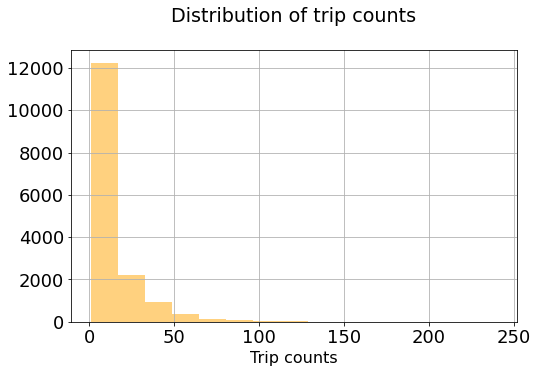

In [90]:
plt.rcParams.update({'font.size': 16})
whole_day['trip count'].hist(figsize = (8,5), bins = 15, alpha = 0.5, color = 'orange')
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax = plt.gca()
#ax.set_axis_bgcolor('white')
plt.title('Distribution of trip counts\n')
plt.xlabel('Trip counts')
plt.ylabel('')

In [91]:
trip_count_rank = whole_day.sort_values(by='trip count', ascending = False)
trip_count_rank.head(20)

start_station_id             start_station_name  \
start_station_id                                                    
519                            519          Pershing Square North   
359                            359             E 47 St & Park Ave   
3255                          3255                8 Ave & W 31 St   
3255                          3255                8 Ave & W 31 St   
402                            402             Broadway & E 22 St   
519                            519          Pershing Square North   
519                            519          Pershing Square North   
519                            519          Pershing Square North   
519                            519          Pershing Square North   
3664                          3664  North Moore St & Greenwich St   
3641                          3641             Broadway & W 25 St   
435                            435                W 21 St & 6 Ave   
3255                          3255                8 Ave & W 31 St   
359                            359             E 47 St & Park Ave   
477                            477                W 41 St & 8 Ave   
477                            477                W 41 St & 8 Ave   
402                            402             Broadway & E 22 St   
497                            497             E 17 St & Broadway   
497                            497             E 17 St & Broadway   
3711                          3711             E 13 St & Avenue A   

                  start_station_latitude  start_station_longitude  trip count  \
start_station_id                                                                
519                            40.751873               -73.977706       240.0   
359                            40.755103               -73.974987       216.0   
3255                           40.750585               -73.994685       208.0   
3255                           40.750585               -73.994685       192.0   
402                            40.740343               -73.989551       191.0   
519                            40.751873               -73.977706       184.0   
519                            40.751873               -73.977706       182.0   
519                            40.751873               -73.977706       176.0   
519                            40.751873               -73.977706       173.0   
3664                           40.720195               -74.010301       171.0   
3641                           40.742869               -73.989186       165.0   
435                            40.741740               -73.994156       164.0   
3255                           40.750585               -73.994685       162.0   
359                            40.755103               -73.974987       157.0   
477                            40.756405               -73.990026       149.0   
477                            40.755000               -73.989000       149.0   
402                            40.740343               -73.989551       147.0   
497                            40.737050               -73.990093       147.0   
497                            40.737000               -73.989000       147.0   
3711                           40.729667               -73.980680       136.0   

                  mean duration  hour  
start_station_id                       
519                   10.595833     8  
359                   13.305556    17  
3255                  11.264423     7  
3255                  11.348958     6  
402                    9.047120    18  
519                   13.141304    18  
519                   10.648352     9  
519                   13.863636    17  
519                   11.641618     7  
3664                   9.187135    17  
3641                  10.363636    17  
435                   10.768293    18  
3255                  10.864198     8  
359                   12.420382    18  
477                    9.362416     6  
477                    9.362416     

In [92]:
df

tripduration               starttime  \
starttime                                                       
2019-12-15 00:00:01.529          1070 2019-12-15 00:00:01.529   
2019-12-15 00:00:10.100          1756 2019-12-15 00:00:10.100   
2019-12-15 00:00:12.226           230 2019-12-15 00:00:12.226   
2019-12-15 00:00:16.385           686 2019-12-15 00:00:16.385   
2019-12-15 00:00:21.888          1770 2019-12-15 00:00:21.888   
2019-12-15 00:00:24.068           605 2019-12-15 00:00:24.068   
2019-12-15 00:00:27.733           492 2019-12-15 00:00:27.733   
2019-12-15 00:00:30.090           888 2019-12-15 00:00:30.090   
2019-12-15 00:00:36.061           298 2019-12-15 00:00:36.061   
2019-12-15 00:00:37.232           186 2019-12-15 00:00:37.232   
2019-12-15 00:00:40.565           545 2019-12-15 00:00:40.565   
2019-12-15 00:00:42.535          1789 2019-12-15 00:00:42.535   
2019-12-15 00:00:48.053           171 2019-12-15 00:00:48.053   
2019-12-15 00:00:54.109           695 2019-12-15 00:00:54.109   
2019-12-15 00:01:00.742          1693 2019-12-15 00:01:00.742   
2019-12-15 00:01:01.606           722 2019-12-15 00:01:01.606   
2019-12-15 00:01:05.727           622 2019-12-15 00:01:05.727   
2019-12-15 00:01:06.634          1224 2019-12-15 00:01:06.634   
2019-12-15 00:01:11.205           673 2019-12-15 00:01:11.205   
2019-12-15 00:01:14.954           242 2019-12-15 00:01:14.954   
2019-12-15 00:01:18.800           477 2019-12-15 00:01:18.800   
2019-12-15 00:01:22.188          1207 2019-12-15 00:01:22.188   
2019-12-15 00:01:22.550           871 2019-12-15 00:01:22.550   
2019-12-15 00:01:29.366          1051 2019-12-15 00:01:29.366   
2019-12-15 00:01:41.010           258 2019-12-15 00:01:41.010   
2019-12-15 00:01:41.068           266 2019-12-15 00:01:41.068   
2019-12-15 00:01:45.060          1684 2019-12-15 00:01:45.060   
2019-12-15 00:01:46.266          1605 2019-12-15 00:01:46.266   
2019-12-15 00:01:51.206          1003 2019-12-15 00:01:51.206   
2019-12-15 00:01:52.391          1397 2019-12-15 00:01:52.391   
...                               ...                     ...   
2019-12-21 23:54:52.062           985 2019-12-21 23:54:52.062   
2019-12-21 23:54:55.869           983 2019-12-21 23:54:55.869   
2019-12-21 23:55:12.447          1873 2019-12-21 23:55:12.447   
2019-12-21 23:55:38.688           335 2019-12-21 23:55:38.688   
2019-12-21 23:55:41.969           520 2019-12-21 23:55:41.969   
2019-12-21 23:55:55.966           975 2019-12-21 23:55:55.966   
2019-12-21 23:55:57.119          1204 2019-12-21 23:55:57.119   
2019-12-21 23:56:05.710           654 2019-12-21 23:56:05.710   
2019-12-21 23:56:06.882          1122 2019-12-21 23:56:06.882   
2019-12-21 23:56:14.297          1339 2019-12-21 23:56:14.297   
2019-12-21 23:56:25.751          1781 2019-12-21 23:56:25.751   
2019-12-21 23:56:28.977           517 2019-12-21 23:56:28.977   
2019-12-21 23:56:29.917           779 2019-12-21 23:56:29.917   
2019-12-21 23:56:35.142           276 2019-12-21 23:56:35.142   
2019-12-21 23:56:50.376           312 2019-12-21 23:56:50.376   
2019-12-21 23:56:52.740           545 2019-12-21 23:56:52.740   
2019-12-21 23:56:56.003           375 2019-12-21 23:56:56.003   
2019-12-21 23:56:59.678          1250 2019-12-21 23:56:59.678   
2019-12-21 23:57:09.319           569 2019-12-21 23:57:09.319   
2019-12-21 23:57:13.784          1043 2019-12-21 23:57:13.784   
2019-12-21 23:57:55.834           605 2019-12-21 23:57:55.834   
2019-12-21 23:57:57.144           382 2019-12-21 23:57:57.144   
2019-12-21 23:58:16.114          3350 2019-12-21 23:58:16.114   
2019-12-21 23:58:19.323           237 2019-12-21 23:58:19.323   
2019-12-21 23:58:35.101           265 2019-12-21 23:58:35.101   
2019-12-21 23:58:45.517           733 2019-12-21 23:58:45.517   
2019-12-21 23:59:26.487           227 2019-12-21 23:59:26.487   
2019-12-21 23:59:26.862           163 2019-12-21 23:59:26.862   
2019-12-21 23:59:30.936           516 2019-12-21 23:59:30.93

### Split 24 hour day into 6 intervals of 4 hours each
#### Post this, we Split by Weekdays & Weekends

In [93]:
df_test_time = df
df_test_time1 = (df_test_time['start_time'] >= '00:00:00') & (df_test_time['start_time'] < '04:00:00' )
df_test_time1 = df.loc[df_test_time1]
df_test_time1

tripduration               starttime  \
starttime                                                       
2019-12-15 00:00:01.529          1070 2019-12-15 00:00:01.529   
2019-12-15 00:00:10.100          1756 2019-12-15 00:00:10.100   
2019-12-15 00:00:12.226           230 2019-12-15 00:00:12.226   
2019-12-15 00:00:16.385           686 2019-12-15 00:00:16.385   
2019-12-15 00:00:21.888          1770 2019-12-15 00:00:21.888   
2019-12-15 00:00:24.068           605 2019-12-15 00:00:24.068   
2019-12-15 00:00:27.733           492 2019-12-15 00:00:27.733   
2019-12-15 00:00:30.090           888 2019-12-15 00:00:30.090   
2019-12-15 00:00:36.061           298 2019-12-15 00:00:36.061   
2019-12-15 00:00:37.232           186 2019-12-15 00:00:37.232   
2019-12-15 00:00:40.565           545 2019-12-15 00:00:40.565   
2019-12-15 00:00:42.535          1789 2019-12-15 00:00:42.535   
2019-12-15 00:00:48.053           171 2019-12-15 00:00:48.053   
2019-12-15 00:00:54.109           695 2019-12-15 00:00:54.109   
2019-12-15 00:01:00.742          1693 2019-12-15 00:01:00.742   
2019-12-15 00:01:01.606           722 2019-12-15 00:01:01.606   
2019-12-15 00:01:05.727           622 2019-12-15 00:01:05.727   
2019-12-15 00:01:06.634          1224 2019-12-15 00:01:06.634   
2019-12-15 00:01:11.205           673 2019-12-15 00:01:11.205   
2019-12-15 00:01:14.954           242 2019-12-15 00:01:14.954   
2019-12-15 00:01:18.800           477 2019-12-15 00:01:18.800   
2019-12-15 00:01:22.188          1207 2019-12-15 00:01:22.188   
2019-12-15 00:01:22.550           871 2019-12-15 00:01:22.550   
2019-12-15 00:01:29.366          1051 2019-12-15 00:01:29.366   
2019-12-15 00:01:41.010           258 2019-12-15 00:01:41.010   
2019-12-15 00:01:41.068           266 2019-12-15 00:01:41.068   
2019-12-15 00:01:45.060          1684 2019-12-15 00:01:45.060   
2019-12-15 00:01:46.266          1605 2019-12-15 00:01:46.266   
2019-12-15 00:01:51.206          1003 2019-12-15 00:01:51.206   
2019-12-15 00:01:52.391          1397 2019-12-15 00:01:52.391   
...                               ...                     ...   
2019-12-21 03:38:12.199           527 2019-12-21 03:38:12.199   
2019-12-21 03:38:15.045           117 2019-12-21 03:38:15.045   
2019-12-21 03:38:26.686           212 2019-12-21 03:38:26.686   
2019-12-21 03:38:38.221           207 2019-12-21 03:38:38.221   
2019-12-21 03:38:41.593          1374 2019-12-21 03:38:41.593   
2019-12-21 03:39:17.867           230 2019-12-21 03:39:17.867   
2019-12-21 03:39:20.404           465 2019-12-21 03:39:20.404   
2019-12-21 03:39:40.037           252 2019-12-21 03:39:40.037   
2019-12-21 03:39:59.296           227 2019-12-21 03:39:59.296   
2019-12-21 03:40:27.085          1179 2019-12-21 03:40:27.085   
2019-12-21 03:40:43.558           520 2019-12-21 03:40:43.558   
2019-12-21 03:42:07.174           426 2019-12-21 03:42:07.174   
2019-12-21 03:42:43.453           129 2019-12-21 03:42:43.453   
2019-12-21 03:42:49.050           143 2019-12-21 03:42:49.050   
2019-12-21 03:42:55.179           621 2019-12-21 03:42:55.179   
2019-12-21 03:43:47.501           653 2019-12-21 03:43:47.501   
2019-12-21 03:45:22.216           879 2019-12-21 03:45:22.216   
2019-12-21 03:46:43.557           557 2019-12-21 03:46:43.557   
2019-12-21 03:48:41.642           561 2019-12-21 03:48:41.642   
2019-12-21 03:52:22.934           302 2019-12-21 03:52:22.934   
2019-12-21 03:52:44.722           166 2019-12-21 03:52:44.722   
2019-12-21 03:53:14.575           115 2019-12-21 03:53:14.575   
2019-12-21 03:53:52.245          1213 2019-12-21 03:53:52.245   
2019-12-21 03:55:38.767           232 2019-12-21 03:55:38.767   
2019-12-21 03:56:17.642           207 2019-12-21 03:56:17.642   
2019-12-21 03:57:33.341           882 2019-12-21 03:57:33.341   
2019-12-21 03:57:56.479           162 2019-12-21 03:57:56.479   
2019-12-21 03:58:28.684           216 2019-12-21 03:58:28.684   
2019-12-21 03:58:44.893          1548 2019-12-21 03:58:44.89

In [94]:
df_test_time1_wkend = df_test_time1
df_test_time1_wkend = (df_test_time1_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time1_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time1_wkend = df_test_time1.loc[df_test_time1_wkend]
df_test_time1_wkend

tripduration               starttime  \
starttime                                                       
2019-12-15 00:00:01.529          1070 2019-12-15 00:00:01.529   
2019-12-15 00:00:10.100          1756 2019-12-15 00:00:10.100   
2019-12-15 00:00:12.226           230 2019-12-15 00:00:12.226   
2019-12-15 00:00:16.385           686 2019-12-15 00:00:16.385   
2019-12-15 00:00:21.888          1770 2019-12-15 00:00:21.888   
2019-12-15 00:00:24.068           605 2019-12-15 00:00:24.068   
2019-12-15 00:00:27.733           492 2019-12-15 00:00:27.733   
2019-12-15 00:00:30.090           888 2019-12-15 00:00:30.090   
2019-12-15 00:00:36.061           298 2019-12-15 00:00:36.061   
2019-12-15 00:00:37.232           186 2019-12-15 00:00:37.232   
2019-12-15 00:00:40.565           545 2019-12-15 00:00:40.565   
2019-12-15 00:00:42.535          1789 2019-12-15 00:00:42.535   
2019-12-15 00:00:48.053           171 2019-12-15 00:00:48.053   
2019-12-15 00:00:54.109           695 2019-12-15 00:00:54.109   
2019-12-15 00:01:00.742          1693 2019-12-15 00:01:00.742   
2019-12-15 00:01:01.606           722 2019-12-15 00:01:01.606   
2019-12-15 00:01:05.727           622 2019-12-15 00:01:05.727   
2019-12-15 00:01:06.634          1224 2019-12-15 00:01:06.634   
2019-12-15 00:01:11.205           673 2019-12-15 00:01:11.205   
2019-12-15 00:01:14.954           242 2019-12-15 00:01:14.954   
2019-12-15 00:01:18.800           477 2019-12-15 00:01:18.800   
2019-12-15 00:01:22.188          1207 2019-12-15 00:01:22.188   
2019-12-15 00:01:22.550           871 2019-12-15 00:01:22.550   
2019-12-15 00:01:29.366          1051 2019-12-15 00:01:29.366   
2019-12-15 00:01:41.010           258 2019-12-15 00:01:41.010   
2019-12-15 00:01:41.068           266 2019-12-15 00:01:41.068   
2019-12-15 00:01:45.060          1684 2019-12-15 00:01:45.060   
2019-12-15 00:01:46.266          1605 2019-12-15 00:01:46.266   
2019-12-15 00:01:51.206          1003 2019-12-15 00:01:51.206   
2019-12-15 00:01:52.391          1397 2019-12-15 00:01:52.391   
...                               ...                     ...   
2019-12-15 03:52:49.774           433 2019-12-15 03:52:49.774   
2019-12-15 03:52:50.728           393 2019-12-15 03:52:50.728   
2019-12-15 03:53:07.594           949 2019-12-15 03:53:07.594   
2019-12-15 03:53:12.027           243 2019-12-15 03:53:12.027   
2019-12-15 03:53:39.544           403 2019-12-15 03:53:39.544   
2019-12-15 03:54:02.000           129 2019-12-15 03:54:02.000   
2019-12-15 03:54:06.403           272 2019-12-15 03:54:06.403   
2019-12-15 03:54:54.056          1027 2019-12-15 03:54:54.056   
2019-12-15 03:55:03.195            93 2019-12-15 03:55:03.195   
2019-12-15 03:55:23.686           200 2019-12-15 03:55:23.686   
2019-12-15 03:55:31.938           712 2019-12-15 03:55:31.938   
2019-12-15 03:55:33.177           841 2019-12-15 03:55:33.177   
2019-12-15 03:55:40.789           876 2019-12-15 03:55:40.789   
2019-12-15 03:56:04.230          1234 2019-12-15 03:56:04.230   
2019-12-15 03:56:24.901           714 2019-12-15 03:56:24.901   
2019-12-15 03:57:10.856          1049 2019-12-15 03:57:10.856   
2019-12-15 03:57:34.984           599 2019-12-15 03:57:34.984   
2019-12-15 03:57:35.797           217 2019-12-15 03:57:35.797   
2019-12-15 03:57:36.265           329 2019-12-15 03:57:36.265   
2019-12-15 03:57:42.470           111 2019-12-15 03:57:42.470   
2019-12-15 03:57:59.075           115 2019-12-15 03:57:59.075   
2019-12-15 03:57:59.400           315 2019-12-15 03:57:59.400   
2019-12-15 03:58:00.298          1913 2019-12-15 03:58:00.298   
2019-12-15 03:58:02.572           339 2019-12-15 03:58:02.572   
2019-12-15 03:58:12.292           237 2019-12-15 03:58:12.292   
2019-12-15 03:58:13.684           252 2019-12-15 03:58:13.684   
2019-12-15 03:58:37.929           134 2019-12-15 03:58:37.929   
2019-12-15 03:58:48.256           476 2019-12-15 03:58:48.256   
2019-12-15 03:59:30.794           177 2019-12-15 03:59:30.79

In [95]:
df_test_time1_wk = df_test_time1
df_test_time1_wk = (df_test_time1_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time1_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time1_wk = df_test_time1.loc[df_test_time1_wk]
df_test_time1_wk

tripduration               starttime  \
starttime                                                       
2019-12-16 00:00:30.088           397 2019-12-16 00:00:30.088   
2019-12-16 00:00:34.114          1480 2019-12-16 00:00:34.114   
2019-12-16 00:00:35.872           603 2019-12-16 00:00:35.872   
2019-12-16 00:00:36.208           812 2019-12-16 00:00:36.208   
2019-12-16 00:00:38.225           389 2019-12-16 00:00:38.225   
2019-12-16 00:00:41.726          1633 2019-12-16 00:00:41.726   
2019-12-16 00:00:55.844           604 2019-12-16 00:00:55.844   
2019-12-16 00:00:57.128           305 2019-12-16 00:00:57.128   
2019-12-16 00:00:59.604           193 2019-12-16 00:00:59.604   
2019-12-16 00:01:01.774           279 2019-12-16 00:01:01.774   
2019-12-16 00:01:17.537           282 2019-12-16 00:01:17.537   
2019-12-16 00:01:19.099           210 2019-12-16 00:01:19.099   
2019-12-16 00:01:24.469           309 2019-12-16 00:01:24.469   
2019-12-16 00:01:29.794           590 2019-12-16 00:01:29.794   
2019-12-16 00:01:36.981          1779 2019-12-16 00:01:36.981   
2019-12-16 00:01:46.630           270 2019-12-16 00:01:46.630   
2019-12-16 00:01:56.735          1232 2019-12-16 00:01:56.735   
2019-12-16 00:01:59.345           371 2019-12-16 00:01:59.345   
2019-12-16 00:02:04.576           500 2019-12-16 00:02:04.576   
2019-12-16 00:02:17.119           287 2019-12-16 00:02:17.119   
2019-12-16 00:02:21.055           290 2019-12-16 00:02:21.055   
2019-12-16 00:02:36.258           789 2019-12-16 00:02:36.258   
2019-12-16 00:02:41.420           226 2019-12-16 00:02:41.420   
2019-12-16 00:02:54.236           506 2019-12-16 00:02:54.236   
2019-12-16 00:03:02.779           718 2019-12-16 00:03:02.779   
2019-12-16 00:03:14.605           801 2019-12-16 00:03:14.605   
2019-12-16 00:03:20.511           852 2019-12-16 00:03:20.511   
2019-12-16 00:03:47.954           370 2019-12-16 00:03:47.954   
2019-12-16 00:04:01.434          1337 2019-12-16 00:04:01.434   
2019-12-16 00:04:04.805           345 2019-12-16 00:04:04.805   
...                               ...                     ...   
2019-12-16 03:21:29.684           199 2019-12-16 03:21:29.684   
2019-12-16 03:21:38.976           101 2019-12-16 03:21:38.976   
2019-12-16 03:22:59.520           162 2019-12-16 03:22:59.520   
2019-12-16 03:26:04.358           804 2019-12-16 03:26:04.358   
2019-12-16 03:26:22.473           385 2019-12-16 03:26:22.473   
2019-12-16 03:26:45.114           769 2019-12-16 03:26:45.114   
2019-12-16 03:26:45.965           185 2019-12-16 03:26:45.965   
2019-12-16 03:27:09.663           596 2019-12-16 03:27:09.663   
2019-12-16 03:27:10.800           885 2019-12-16 03:27:10.800   
2019-12-16 03:29:49.650           440 2019-12-16 03:29:49.650   
2019-12-16 03:31:29.338           551 2019-12-16 03:31:29.338   
2019-12-16 03:31:31.788          2629 2019-12-16 03:31:31.788   
2019-12-16 03:32:41.064           277 2019-12-16 03:32:41.064   
2019-12-16 03:34:02.352           363 2019-12-16 03:34:02.352   
2019-12-16 03:37:12.353           303 2019-12-16 03:37:12.353   
2019-12-16 03:37:55.230           262 2019-12-16 03:37:55.230   
2019-12-16 03:38:11.810           284 2019-12-16 03:38:11.810   
2019-12-16 03:40:41.313           600 2019-12-16 03:40:41.313   
2019-12-16 03:43:47.822           130 2019-12-16 03:43:47.822   
2019-12-16 03:46:18.163           458 2019-12-16 03:46:18.163   
2019-12-16 03:46:46.060           217 2019-12-16 03:46:46.060   
2019-12-16 03:47:36.325           274 2019-12-16 03:47:36.325   
2019-12-16 03:47:53.248          2494 2019-12-16 03:47:53.248   
2019-12-16 03:48:28.000           399 2019-12-16 03:48:28.000   
2019-12-16 03:48:34.679           332 2019-12-16 03:48:34.679   
2019-12-16 03:51:42.557           475 2019-12-16 03:51:42.557   
2019-12-16 03:52:53.888           230 2019-12-16 03:52:53.888   
2019-12-16 03:54:18.593           243 2019-12-16 03:54:18.593   
2019-12-16 03:58:11.792           337 2019-12-16 03:58:11.79

In [96]:
df_test_time2 = df
df_test_time2 = (df_test_time2['start_time'] >= '04:00:00') & (df_test_time2['start_time'] < '08:00:00' )
df_test_time2 = df.loc[df_test_time2]
df_test_time2

tripduration               starttime  \
starttime                                                       
2019-12-15 04:00:16.648          1353 2019-12-15 04:00:16.648   
2019-12-15 04:00:21.379           268 2019-12-15 04:00:21.379   
2019-12-15 04:00:30.342           250 2019-12-15 04:00:30.342   
2019-12-15 04:00:37.149           234 2019-12-15 04:00:37.149   
2019-12-15 04:00:54.884           212 2019-12-15 04:00:54.884   
2019-12-15 04:00:59.259          1011 2019-12-15 04:00:59.259   
2019-12-15 04:01:44.477            96 2019-12-15 04:01:44.477   
2019-12-15 04:01:57.907          1877 2019-12-15 04:01:57.907   
2019-12-15 04:02:02.640          2126 2019-12-15 04:02:02.640   
2019-12-15 04:02:21.216           396 2019-12-15 04:02:21.216   
2019-12-15 04:02:39.456          2497 2019-12-15 04:02:39.456   
2019-12-15 04:02:44.275           462 2019-12-15 04:02:44.275   
2019-12-15 04:03:40.131          1553 2019-12-15 04:03:40.131   
2019-12-15 04:03:56.954           584 2019-12-15 04:03:56.954   
2019-12-15 04:04:00.818           222 2019-12-15 04:04:00.818   
2019-12-15 04:04:28.546           219 2019-12-15 04:04:28.546   
2019-12-15 04:05:29.800           547 2019-12-15 04:05:29.800   
2019-12-15 04:05:49.627           278 2019-12-15 04:05:49.627   
2019-12-15 04:05:51.349          1650 2019-12-15 04:05:51.349   
2019-12-15 04:05:53.181           242 2019-12-15 04:05:53.181   
2019-12-15 04:05:54.298           586 2019-12-15 04:05:54.298   
2019-12-15 04:06:20.841           914 2019-12-15 04:06:20.841   
2019-12-15 04:06:33.189           677 2019-12-15 04:06:33.189   
2019-12-15 04:06:37.991          2279 2019-12-15 04:06:37.991   
2019-12-15 04:06:39.386           507 2019-12-15 04:06:39.386   
2019-12-15 04:06:47.427           103 2019-12-15 04:06:47.427   
2019-12-15 04:07:10.466           189 2019-12-15 04:07:10.466   
2019-12-15 04:07:30.559           528 2019-12-15 04:07:30.559   
2019-12-15 04:07:32.465           991 2019-12-15 04:07:32.465   
2019-12-15 04:07:40.980           223 2019-12-15 04:07:40.980   
...                               ...                     ...   
2019-12-21 07:56:35.463           375 2019-12-21 07:56:35.463   
2019-12-21 07:56:45.579           399 2019-12-21 07:56:45.579   
2019-12-21 07:56:52.056           205 2019-12-21 07:56:52.056   
2019-12-21 07:57:07.345           139 2019-12-21 07:57:07.345   
2019-12-21 07:57:21.975           387 2019-12-21 07:57:21.975   
2019-12-21 07:57:28.754           258 2019-12-21 07:57:28.754   
2019-12-21 07:57:36.347           250 2019-12-21 07:57:36.347   
2019-12-21 07:57:50.114          1519 2019-12-21 07:57:50.114   
2019-12-21 07:57:58.735           620 2019-12-21 07:57:58.735   
2019-12-21 07:57:58.870           785 2019-12-21 07:57:58.870   
2019-12-21 07:58:08.579           494 2019-12-21 07:58:08.579   
2019-12-21 07:58:11.799           108 2019-12-21 07:58:11.799   
2019-12-21 07:58:14.636           904 2019-12-21 07:58:14.636   
2019-12-21 07:58:19.269           830 2019-12-21 07:58:19.269   
2019-12-21 07:58:24.158           186 2019-12-21 07:58:24.158   
2019-12-21 07:58:26.200           910 2019-12-21 07:58:26.200   
2019-12-21 07:58:29.933           313 2019-12-21 07:58:29.933   
2019-12-21 07:58:35.038           565 2019-12-21 07:58:35.038   
2019-12-21 07:58:36.291           109 2019-12-21 07:58:36.291   
2019-12-21 07:58:41.153           529 2019-12-21 07:58:41.153   
2019-12-21 07:59:08.103           790 2019-12-21 07:59:08.103   
2019-12-21 07:59:12.440           120 2019-12-21 07:59:12.440   
2019-12-21 07:59:15.538           239 2019-12-21 07:59:15.538   
2019-12-21 07:59:17.547           716 2019-12-21 07:59:17.547   
2019-12-21 07:59:29.119           259 2019-12-21 07:59:29.119   
2019-12-21 07:59:35.107           284 2019-12-21 07:59:35.107   
2019-12-21 07:59:38.229           347 2019-12-21 07:59:38.229   
2019-12-21 07:59:47.319           108 2019-12-21 07:59:47.319   
2019-12-21 07:59:52.500           298 2019-12-21 07:59:52.50

In [97]:
df_test_time2_wkend = df_test_time2
df_test_time2_wkend = (df_test_time2_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time2_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time2_wkend = df_test_time2.loc[df_test_time2_wkend]
df_test_time2_wkend

tripduration               starttime  \
starttime                                                       
2019-12-15 04:00:16.648          1353 2019-12-15 04:00:16.648   
2019-12-15 04:00:21.379           268 2019-12-15 04:00:21.379   
2019-12-15 04:00:30.342           250 2019-12-15 04:00:30.342   
2019-12-15 04:00:37.149           234 2019-12-15 04:00:37.149   
2019-12-15 04:00:54.884           212 2019-12-15 04:00:54.884   
2019-12-15 04:00:59.259          1011 2019-12-15 04:00:59.259   
2019-12-15 04:01:44.477            96 2019-12-15 04:01:44.477   
2019-12-15 04:01:57.907          1877 2019-12-15 04:01:57.907   
2019-12-15 04:02:02.640          2126 2019-12-15 04:02:02.640   
2019-12-15 04:02:21.216           396 2019-12-15 04:02:21.216   
2019-12-15 04:02:39.456          2497 2019-12-15 04:02:39.456   
2019-12-15 04:02:44.275           462 2019-12-15 04:02:44.275   
2019-12-15 04:03:40.131          1553 2019-12-15 04:03:40.131   
2019-12-15 04:03:56.954           584 2019-12-15 04:03:56.954   
2019-12-15 04:04:00.818           222 2019-12-15 04:04:00.818   
2019-12-15 04:04:28.546           219 2019-12-15 04:04:28.546   
2019-12-15 04:05:29.800           547 2019-12-15 04:05:29.800   
2019-12-15 04:05:49.627           278 2019-12-15 04:05:49.627   
2019-12-15 04:05:51.349          1650 2019-12-15 04:05:51.349   
2019-12-15 04:05:53.181           242 2019-12-15 04:05:53.181   
2019-12-15 04:05:54.298           586 2019-12-15 04:05:54.298   
2019-12-15 04:06:20.841           914 2019-12-15 04:06:20.841   
2019-12-15 04:06:33.189           677 2019-12-15 04:06:33.189   
2019-12-15 04:06:37.991          2279 2019-12-15 04:06:37.991   
2019-12-15 04:06:39.386           507 2019-12-15 04:06:39.386   
2019-12-15 04:06:47.427           103 2019-12-15 04:06:47.427   
2019-12-15 04:07:10.466           189 2019-12-15 04:07:10.466   
2019-12-15 04:07:30.559           528 2019-12-15 04:07:30.559   
2019-12-15 04:07:32.465           991 2019-12-15 04:07:32.465   
2019-12-15 04:07:40.980           223 2019-12-15 04:07:40.980   
...                               ...                     ...   
2019-12-15 07:56:26.718           136 2019-12-15 07:56:26.718   
2019-12-15 07:56:26.945           921 2019-12-15 07:56:26.945   
2019-12-15 07:56:30.364           400 2019-12-15 07:56:30.364   
2019-12-15 07:56:45.391          1675 2019-12-15 07:56:45.391   
2019-12-15 07:56:49.807           722 2019-12-15 07:56:49.807   
2019-12-15 07:57:09.355           595 2019-12-15 07:57:09.355   
2019-12-15 07:57:39.612           268 2019-12-15 07:57:39.612   
2019-12-15 07:57:41.025           237 2019-12-15 07:57:41.025   
2019-12-15 07:57:50.058           192 2019-12-15 07:57:50.058   
2019-12-15 07:57:53.292           519 2019-12-15 07:57:53.292   
2019-12-15 07:58:01.471           191 2019-12-15 07:58:01.471   
2019-12-15 07:58:19.588           434 2019-12-15 07:58:19.588   
2019-12-15 07:58:21.032           988 2019-12-15 07:58:21.032   
2019-12-15 07:58:28.801           216 2019-12-15 07:58:28.801   
2019-12-15 07:58:30.410           299 2019-12-15 07:58:30.410   
2019-12-15 07:58:34.333           187 2019-12-15 07:58:34.333   
2019-12-15 07:58:35.857           409 2019-12-15 07:58:35.857   
2019-12-15 07:58:44.625           287 2019-12-15 07:58:44.625   
2019-12-15 07:58:56.068           181 2019-12-15 07:58:56.068   
2019-12-15 07:59:10.472           694 2019-12-15 07:59:10.472   
2019-12-15 07:59:12.587           385 2019-12-15 07:59:12.587   
2019-12-15 07:59:14.411           177 2019-12-15 07:59:14.411   
2019-12-15 07:59:14.461           196 2019-12-15 07:59:14.461   
2019-12-15 07:59:15.108           202 2019-12-15 07:59:15.108   
2019-12-15 07:59:16.816           197 2019-12-15 07:59:16.816   
2019-12-15 07:59:20.011          1482 2019-12-15 07:59:20.011   
2019-12-15 07:59:22.190           294 2019-12-15 07:59:22.190   
2019-12-15 07:59:38.513           884 2019-12-15 07:59:38.513   
2019-12-15 07:59:39.322           270 2019-12-15 07:59:39.32

In [98]:
df_test_time2_wk = df_test_time2
df_test_time2_wk = (df_test_time2_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time2_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time2_wk = df_test_time2.loc[df_test_time2_wk]
df_test_time2_wk

tripduration               starttime  \
starttime                                                       
2019-12-16 04:01:31.191           193 2019-12-16 04:01:31.191   
2019-12-16 04:01:52.027           214 2019-12-16 04:01:52.027   
2019-12-16 04:04:33.742           761 2019-12-16 04:04:33.742   
2019-12-16 04:04:41.001           150 2019-12-16 04:04:41.001   
2019-12-16 04:05:50.663           268 2019-12-16 04:05:50.663   
2019-12-16 04:09:35.041           530 2019-12-16 04:09:35.041   
2019-12-16 04:09:49.064          1656 2019-12-16 04:09:49.064   
2019-12-16 04:11:39.726           972 2019-12-16 04:11:39.726   
2019-12-16 04:12:09.410           753 2019-12-16 04:12:09.410   
2019-12-16 04:14:58.204           326 2019-12-16 04:14:58.204   
2019-12-16 04:15:46.703           993 2019-12-16 04:15:46.703   
2019-12-16 04:16:42.177          2503 2019-12-16 04:16:42.177   
2019-12-16 04:16:44.335           407 2019-12-16 04:16:44.335   
2019-12-16 04:16:58.238           442 2019-12-16 04:16:58.238   
2019-12-16 04:17:34.209           614 2019-12-16 04:17:34.209   
2019-12-16 04:18:23.147           700 2019-12-16 04:18:23.147   
2019-12-16 04:19:11.648           175 2019-12-16 04:19:11.648   
2019-12-16 04:20:20.742           441 2019-12-16 04:20:20.742   
2019-12-16 04:20:27.599          1641 2019-12-16 04:20:27.599   
2019-12-16 04:20:32.802          1361 2019-12-16 04:20:32.802   
2019-12-16 04:21:30.197           140 2019-12-16 04:21:30.197   
2019-12-16 04:22:14.263           645 2019-12-16 04:22:14.263   
2019-12-16 04:24:17.897          2691 2019-12-16 04:24:17.897   
2019-12-16 04:24:20.184           306 2019-12-16 04:24:20.184   
2019-12-16 04:27:19.161           397 2019-12-16 04:27:19.161   
2019-12-16 04:28:03.489           124 2019-12-16 04:28:03.489   
2019-12-16 04:28:57.663           583 2019-12-16 04:28:57.663   
2019-12-16 04:29:27.866           239 2019-12-16 04:29:27.866   
2019-12-16 04:29:39.391          1648 2019-12-16 04:29:39.391   
2019-12-16 04:29:51.231           560 2019-12-16 04:29:51.231   
...                               ...                     ...   
2019-12-16 07:59:28.312          1432 2019-12-16 07:59:28.312   
2019-12-16 07:59:31.262          1477 2019-12-16 07:59:31.262   
2019-12-16 07:59:31.460           447 2019-12-16 07:59:31.460   
2019-12-16 07:59:31.541           422 2019-12-16 07:59:31.541   
2019-12-16 07:59:32.601          1473 2019-12-16 07:59:32.601   
2019-12-16 07:59:33.733          1272 2019-12-16 07:59:33.733   
2019-12-16 07:59:34.131           506 2019-12-16 07:59:34.131   
2019-12-16 07:59:36.036          1227 2019-12-16 07:59:36.036   
2019-12-16 07:59:37.088           161 2019-12-16 07:59:37.088   
2019-12-16 07:59:39.106           681 2019-12-16 07:59:39.106   
2019-12-16 07:59:39.257           994 2019-12-16 07:59:39.257   
2019-12-16 07:59:40.564           300 2019-12-16 07:59:40.564   
2019-12-16 07:59:41.266          1298 2019-12-16 07:59:41.266   
2019-12-16 07:59:43.227          1167 2019-12-16 07:59:43.227   
2019-12-16 07:59:43.258          1051 2019-12-16 07:59:43.258   
2019-12-16 07:59:44.672           255 2019-12-16 07:59:44.672   
2019-12-16 07:59:44.911           334 2019-12-16 07:59:44.911   
2019-12-16 07:59:45.510           252 2019-12-16 07:59:45.510   
2019-12-16 07:59:48.724           317 2019-12-16 07:59:48.724   
2019-12-16 07:59:48.887           344 2019-12-16 07:59:48.887   
2019-12-16 07:59:48.956          1236 2019-12-16 07:59:48.956   
2019-12-16 07:59:50.837           300 2019-12-16 07:59:50.837   
2019-12-16 07:59:50.901           908 2019-12-16 07:59:50.901   
2019-12-16 07:59:52.967           728 2019-12-16 07:59:52.967   
2019-12-16 07:59:54.516           290 2019-12-16 07:59:54.516   
2019-12-16 07:59:55.293           166 2019-12-16 07:59:55.293   
2019-12-16 07:59:56.687           622 2019-12-16 07:59:56.687   
2019-12-16 07:59:57.075           859 2019-12-16 07:59:57.075   
2019-12-16 07:59:57.092          1051 2019-12-16 07:59:57.09

In [99]:
df_test_time3 = df
df_test_time3 = (df_test_time3['start_time'] >= '08:00:00') & (df_test_time3['start_time'] < '12:00:00' )
df_test_time3 = df.loc[df_test_time3]
df_test_time3

tripduration               starttime  \
starttime                                                       
2019-12-15 08:00:08.263           550 2019-12-15 08:00:08.263   
2019-12-15 08:00:18.850          1213 2019-12-15 08:00:18.850   
2019-12-15 08:00:21.255          2238 2019-12-15 08:00:21.255   
2019-12-15 08:00:26.997           364 2019-12-15 08:00:26.997   
2019-12-15 08:00:33.802           279 2019-12-15 08:00:33.802   
2019-12-15 08:00:34.100           237 2019-12-15 08:00:34.100   
2019-12-15 08:00:35.318           208 2019-12-15 08:00:35.318   
2019-12-15 08:00:37.903           428 2019-12-15 08:00:37.903   
2019-12-15 08:00:53.195           610 2019-12-15 08:00:53.195   
2019-12-15 08:01:08.358           738 2019-12-15 08:01:08.358   
2019-12-15 08:01:14.032           357 2019-12-15 08:01:14.032   
2019-12-15 08:01:20.029           149 2019-12-15 08:01:20.029   
2019-12-15 08:01:35.595           196 2019-12-15 08:01:35.595   
2019-12-15 08:01:39.365           585 2019-12-15 08:01:39.365   
2019-12-15 08:01:46.171           808 2019-12-15 08:01:46.171   
2019-12-15 08:01:56.039           550 2019-12-15 08:01:56.039   
2019-12-15 08:02:37.479           809 2019-12-15 08:02:37.479   
2019-12-15 08:02:55.420           156 2019-12-15 08:02:55.420   
2019-12-15 08:03:06.442           769 2019-12-15 08:03:06.442   
2019-12-15 08:03:20.402           361 2019-12-15 08:03:20.402   
2019-12-15 08:03:25.081          1218 2019-12-15 08:03:25.081   
2019-12-15 08:03:29.334           220 2019-12-15 08:03:29.334   
2019-12-15 08:03:41.901           519 2019-12-15 08:03:41.901   
2019-12-15 08:03:43.875           367 2019-12-15 08:03:43.875   
2019-12-15 08:03:55.068           127 2019-12-15 08:03:55.068   
2019-12-15 08:04:00.834           453 2019-12-15 08:04:00.834   
2019-12-15 08:04:10.921           190 2019-12-15 08:04:10.921   
2019-12-15 08:04:16.663           261 2019-12-15 08:04:16.663   
2019-12-15 08:04:17.653           465 2019-12-15 08:04:17.653   
2019-12-15 08:04:33.151           726 2019-12-15 08:04:33.151   
...                               ...                     ...   
2019-12-21 11:59:06.550           127 2019-12-21 11:59:06.550   
2019-12-21 11:59:06.638           920 2019-12-21 11:59:06.638   
2019-12-21 11:59:09.133           173 2019-12-21 11:59:09.133   
2019-12-21 11:59:09.366          1041 2019-12-21 11:59:09.366   
2019-12-21 11:59:10.036           625 2019-12-21 11:59:10.036   
2019-12-21 11:59:10.411          1101 2019-12-21 11:59:10.411   
2019-12-21 11:59:11.555           250 2019-12-21 11:59:11.555   
2019-12-21 11:59:12.076           306 2019-12-21 11:59:12.076   
2019-12-21 11:59:13.899          1057 2019-12-21 11:59:13.899   
2019-12-21 11:59:14.312          1580 2019-12-21 11:59:14.312   
2019-12-21 11:59:17.647           232 2019-12-21 11:59:17.647   
2019-12-21 11:59:22.180           932 2019-12-21 11:59:22.180   
2019-12-21 11:59:23.227           387 2019-12-21 11:59:23.227   
2019-12-21 11:59:26.472           318 2019-12-21 11:59:26.472   
2019-12-21 11:59:29.987           400 2019-12-21 11:59:29.987   
2019-12-21 11:59:37.341           663 2019-12-21 11:59:37.341   
2019-12-21 11:59:42.232           423 2019-12-21 11:59:42.232   
2019-12-21 11:59:43.009           404 2019-12-21 11:59:43.009   
2019-12-21 11:59:43.596          1963 2019-12-21 11:59:43.596   
2019-12-21 11:59:45.423           959 2019-12-21 11:59:45.423   
2019-12-21 11:59:47.679           536 2019-12-21 11:59:47.679   
2019-12-21 11:59:48.186           330 2019-12-21 11:59:48.186   
2019-12-21 11:59:52.060           228 2019-12-21 11:59:52.060   
2019-12-21 11:59:52.464           615 2019-12-21 11:59:52.464   
2019-12-21 11:59:52.850          1521 2019-12-21 11:59:52.850   
2019-12-21 11:59:55.039           411 2019-12-21 11:59:55.039   
2019-12-21 11:59:55.053           700 2019-12-21 11:59:55.053   
2019-12-21 11:59:55.090          2157 2019-12-21 11:59:55.090   
2019-12-21 11:59:56.020          1844 2019-12-21 11:59:56.02

In [100]:
df_test_time3_wkend = df_test_time3
df_test_time3_wkend = (df_test_time3_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time3_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time3_wkend = df_test_time3.loc[df_test_time3_wkend]
df_test_time3_wkend

tripduration               starttime  \
starttime                                                       
2019-12-15 08:00:08.263           550 2019-12-15 08:00:08.263   
2019-12-15 08:00:18.850          1213 2019-12-15 08:00:18.850   
2019-12-15 08:00:21.255          2238 2019-12-15 08:00:21.255   
2019-12-15 08:00:26.997           364 2019-12-15 08:00:26.997   
2019-12-15 08:00:33.802           279 2019-12-15 08:00:33.802   
2019-12-15 08:00:34.100           237 2019-12-15 08:00:34.100   
2019-12-15 08:00:35.318           208 2019-12-15 08:00:35.318   
2019-12-15 08:00:37.903           428 2019-12-15 08:00:37.903   
2019-12-15 08:00:53.195           610 2019-12-15 08:00:53.195   
2019-12-15 08:01:08.358           738 2019-12-15 08:01:08.358   
2019-12-15 08:01:14.032           357 2019-12-15 08:01:14.032   
2019-12-15 08:01:20.029           149 2019-12-15 08:01:20.029   
2019-12-15 08:01:35.595           196 2019-12-15 08:01:35.595   
2019-12-15 08:01:39.365           585 2019-12-15 08:01:39.365   
2019-12-15 08:01:46.171           808 2019-12-15 08:01:46.171   
2019-12-15 08:01:56.039           550 2019-12-15 08:01:56.039   
2019-12-15 08:02:37.479           809 2019-12-15 08:02:37.479   
2019-12-15 08:02:55.420           156 2019-12-15 08:02:55.420   
2019-12-15 08:03:06.442           769 2019-12-15 08:03:06.442   
2019-12-15 08:03:20.402           361 2019-12-15 08:03:20.402   
2019-12-15 08:03:25.081          1218 2019-12-15 08:03:25.081   
2019-12-15 08:03:29.334           220 2019-12-15 08:03:29.334   
2019-12-15 08:03:41.901           519 2019-12-15 08:03:41.901   
2019-12-15 08:03:43.875           367 2019-12-15 08:03:43.875   
2019-12-15 08:03:55.068           127 2019-12-15 08:03:55.068   
2019-12-15 08:04:00.834           453 2019-12-15 08:04:00.834   
2019-12-15 08:04:10.921           190 2019-12-15 08:04:10.921   
2019-12-15 08:04:16.663           261 2019-12-15 08:04:16.663   
2019-12-15 08:04:17.653           465 2019-12-15 08:04:17.653   
2019-12-15 08:04:33.151           726 2019-12-15 08:04:33.151   
...                               ...                     ...   
2019-12-15 11:59:27.174           229 2019-12-15 11:59:27.174   
2019-12-15 11:59:27.918           541 2019-12-15 11:59:27.918   
2019-12-15 11:59:28.867          2284 2019-12-15 11:59:28.867   
2019-12-15 11:59:29.186          1203 2019-12-15 11:59:29.186   
2019-12-15 11:59:29.441           553 2019-12-15 11:59:29.441   
2019-12-15 11:59:29.751           321 2019-12-15 11:59:29.751   
2019-12-15 11:59:30.317           369 2019-12-15 11:59:30.317   
2019-12-15 11:59:30.604           559 2019-12-15 11:59:30.604   
2019-12-15 11:59:32.984           112 2019-12-15 11:59:32.984   
2019-12-15 11:59:34.146           550 2019-12-15 11:59:34.146   
2019-12-15 11:59:34.564          1701 2019-12-15 11:59:34.564   
2019-12-15 11:59:36.921          3048 2019-12-15 11:59:36.921   
2019-12-15 11:59:40.363           642 2019-12-15 11:59:40.363   
2019-12-15 11:59:42.537           734 2019-12-15 11:59:42.537   
2019-12-15 11:59:42.735           188 2019-12-15 11:59:42.735   
2019-12-15 11:59:43.502           478 2019-12-15 11:59:43.502   
2019-12-15 11:59:46.437           665 2019-12-15 11:59:46.437   
2019-12-15 11:59:47.713           440 2019-12-15 11:59:47.713   
2019-12-15 11:59:47.942           286 2019-12-15 11:59:47.942   
2019-12-15 11:59:49.367           197 2019-12-15 11:59:49.367   
2019-12-15 11:59:49.387           447 2019-12-15 11:59:49.387   
2019-12-15 11:59:49.822           290 2019-12-15 11:59:49.822   
2019-12-15 11:59:49.914           652 2019-12-15 11:59:49.914   
2019-12-15 11:59:49.978          1116 2019-12-15 11:59:49.978   
2019-12-15 11:59:52.244           644 2019-12-15 11:59:52.244   
2019-12-15 11:59:54.267           247 2019-12-15 11:59:54.267   
2019-12-15 11:59:54.560           242 2019-12-15 11:59:54.560   
2019-12-15 11:59:54.955           670 2019-12-15 11:59:54.955   
2019-12-15 11:59:57.846           256 2019-12-15 11:59:57.84

In [101]:
df_test_time3_wk = df_test_time3
df_test_time3_wk = (df_test_time3_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time3_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time3_wk = df_test_time3.loc[df_test_time3_wk]
df_test_time3_wk

tripduration               starttime  \
starttime                                                       
2019-12-16 08:00:00.792          1085 2019-12-16 08:00:00.792   
2019-12-16 08:00:02.385           283 2019-12-16 08:00:02.385   
2019-12-16 08:00:03.732           896 2019-12-16 08:00:03.732   
2019-12-16 08:00:05.272           890 2019-12-16 08:00:05.272   
2019-12-16 08:00:07.528          2046 2019-12-16 08:00:07.528   
2019-12-16 08:00:10.157           497 2019-12-16 08:00:10.157   
2019-12-16 08:00:10.553           486 2019-12-16 08:00:10.553   
2019-12-16 08:00:13.071          1069 2019-12-16 08:00:13.071   
2019-12-16 08:00:13.434           293 2019-12-16 08:00:13.434   
2019-12-16 08:00:13.714           624 2019-12-16 08:00:13.714   
2019-12-16 08:00:14.640           748 2019-12-16 08:00:14.640   
2019-12-16 08:00:14.891           320 2019-12-16 08:00:14.891   
2019-12-16 08:00:15.491           133 2019-12-16 08:00:15.491   
2019-12-16 08:00:16.114           853 2019-12-16 08:00:16.114   
2019-12-16 08:00:16.299           932 2019-12-16 08:00:16.299   
2019-12-16 08:00:17.780          1575 2019-12-16 08:00:17.780   
2019-12-16 08:00:18.076           325 2019-12-16 08:00:18.076   
2019-12-16 08:00:18.675           515 2019-12-16 08:00:18.675   
2019-12-16 08:00:20.137          1794 2019-12-16 08:00:20.137   
2019-12-16 08:00:20.923           171 2019-12-16 08:00:20.923   
2019-12-16 08:00:21.378           439 2019-12-16 08:00:21.378   
2019-12-16 08:00:22.022          1593 2019-12-16 08:00:22.022   
2019-12-16 08:00:22.733           659 2019-12-16 08:00:22.733   
2019-12-16 08:00:24.729           923 2019-12-16 08:00:24.729   
2019-12-16 08:00:24.810           625 2019-12-16 08:00:24.810   
2019-12-16 08:00:25.287           518 2019-12-16 08:00:25.287   
2019-12-16 08:00:25.609           212 2019-12-16 08:00:25.609   
2019-12-16 08:00:26.711           960 2019-12-16 08:00:26.711   
2019-12-16 08:00:27.327           323 2019-12-16 08:00:27.327   
2019-12-16 08:00:27.516            92 2019-12-16 08:00:27.516   
...                               ...                     ...   
2019-12-16 11:58:59.036           533 2019-12-16 11:58:59.036   
2019-12-16 11:59:06.000          1360 2019-12-16 11:59:06.000   
2019-12-16 11:59:08.856           568 2019-12-16 11:59:08.856   
2019-12-16 11:59:09.463           613 2019-12-16 11:59:09.463   
2019-12-16 11:59:11.578           523 2019-12-16 11:59:11.578   
2019-12-16 11:59:11.610           273 2019-12-16 11:59:11.610   
2019-12-16 11:59:11.768           960 2019-12-16 11:59:11.768   
2019-12-16 11:59:12.001           426 2019-12-16 11:59:12.001   
2019-12-16 11:59:12.694           914 2019-12-16 11:59:12.694   
2019-12-16 11:59:15.356           295 2019-12-16 11:59:15.356   
2019-12-16 11:59:20.818           522 2019-12-16 11:59:20.818   
2019-12-16 11:59:21.251           889 2019-12-16 11:59:21.251   
2019-12-16 11:59:21.488           122 2019-12-16 11:59:21.488   
2019-12-16 11:59:21.896           337 2019-12-16 11:59:21.896   
2019-12-16 11:59:22.409           310 2019-12-16 11:59:22.409   
2019-12-16 11:59:23.064           723 2019-12-16 11:59:23.064   
2019-12-16 11:59:25.938           340 2019-12-16 11:59:25.938   
2019-12-16 11:59:27.292           290 2019-12-16 11:59:27.292   
2019-12-16 11:59:30.117           189 2019-12-16 11:59:30.117   
2019-12-16 11:59:31.542          1829 2019-12-16 11:59:31.542   
2019-12-16 11:59:36.545          1444 2019-12-16 11:59:36.545   
2019-12-16 11:59:37.116           178 2019-12-16 11:59:37.116   
2019-12-16 11:59:40.654           228 2019-12-16 11:59:40.654   
2019-12-16 11:59:44.175           439 2019-12-16 11:59:44.175   
2019-12-16 11:59:45.838           417 2019-12-16 11:59:45.838   
2019-12-16 11:59:45.954           919 2019-12-16 11:59:45.954   
2019-12-16 11:59:47.810           445 2019-12-16 11:59:47.810   
2019-12-16 11:59:50.050           391 2019-12-16 11:59:50.050   
2019-12-16 11:59:54.744           678 2019-12-16 11:59:54.74

In [102]:
df_test_time4 = df
df_test_time4 = (df_test_time4['start_time'] >= '12:00:00') & (df_test_time4['start_time'] < '16:00:00' )
df_test_time4 = df.loc[df_test_time4]
df_test_time4

tripduration               starttime  \
starttime                                                       
2019-12-15 12:00:00.478           132 2019-12-15 12:00:00.478   
2019-12-15 12:00:01.034          1054 2019-12-15 12:00:01.034   
2019-12-15 12:00:01.748           631 2019-12-15 12:00:01.748   
2019-12-15 12:00:03.794          1318 2019-12-15 12:00:03.794   
2019-12-15 12:00:04.327           475 2019-12-15 12:00:04.327   
2019-12-15 12:00:05.544           235 2019-12-15 12:00:05.544   
2019-12-15 12:00:06.734           347 2019-12-15 12:00:06.734   
2019-12-15 12:00:07.507           573 2019-12-15 12:00:07.507   
2019-12-15 12:00:07.575           339 2019-12-15 12:00:07.575   
2019-12-15 12:00:08.565           178 2019-12-15 12:00:08.565   
2019-12-15 12:00:09.879           567 2019-12-15 12:00:09.879   
2019-12-15 12:00:10.315           330 2019-12-15 12:00:10.315   
2019-12-15 12:00:11.604           552 2019-12-15 12:00:11.604   
2019-12-15 12:00:12.857            95 2019-12-15 12:00:12.857   
2019-12-15 12:00:13.722           193 2019-12-15 12:00:13.722   
2019-12-15 12:00:14.297           366 2019-12-15 12:00:14.297   
2019-12-15 12:00:16.883           171 2019-12-15 12:00:16.883   
2019-12-15 12:00:20.571          1011 2019-12-15 12:00:20.571   
2019-12-15 12:00:22.817           720 2019-12-15 12:00:22.817   
2019-12-15 12:00:23.875          2198 2019-12-15 12:00:23.875   
2019-12-15 12:00:23.987           581 2019-12-15 12:00:23.987   
2019-12-15 12:00:24.331           411 2019-12-15 12:00:24.331   
2019-12-15 12:00:29.442           817 2019-12-15 12:00:29.442   
2019-12-15 12:00:29.520           597 2019-12-15 12:00:29.520   
2019-12-15 12:00:29.620           214 2019-12-15 12:00:29.620   
2019-12-15 12:00:29.899          1933 2019-12-15 12:00:29.899   
2019-12-15 12:00:31.349           524 2019-12-15 12:00:31.349   
2019-12-15 12:00:31.844           218 2019-12-15 12:00:31.844   
2019-12-15 12:00:33.773          2299 2019-12-15 12:00:33.773   
2019-12-15 12:00:34.602          1038 2019-12-15 12:00:34.602   
...                               ...                     ...   
2019-12-21 15:59:13.497          1382 2019-12-21 15:59:13.497   
2019-12-21 15:59:14.733           186 2019-12-21 15:59:14.733   
2019-12-21 15:59:18.898           182 2019-12-21 15:59:18.898   
2019-12-21 15:59:19.241           150 2019-12-21 15:59:19.241   
2019-12-21 15:59:19.768           208 2019-12-21 15:59:19.768   
2019-12-21 15:59:19.772           435 2019-12-21 15:59:19.772   
2019-12-21 15:59:20.845          1016 2019-12-21 15:59:20.845   
2019-12-21 15:59:21.731           331 2019-12-21 15:59:21.731   
2019-12-21 15:59:26.659           797 2019-12-21 15:59:26.659   
2019-12-21 15:59:32.316          1153 2019-12-21 15:59:32.316   
2019-12-21 15:59:33.643          1032 2019-12-21 15:59:33.643   
2019-12-21 15:59:34.449          1512 2019-12-21 15:59:34.449   
2019-12-21 15:59:37.128           365 2019-12-21 15:59:37.128   
2019-12-21 15:59:37.744           536 2019-12-21 15:59:37.744   
2019-12-21 15:59:37.924          2350 2019-12-21 15:59:37.924   
2019-12-21 15:59:41.094           364 2019-12-21 15:59:41.094   
2019-12-21 15:59:41.230           363 2019-12-21 15:59:41.230   
2019-12-21 15:59:45.261           891 2019-12-21 15:59:45.261   
2019-12-21 15:59:46.836           643 2019-12-21 15:59:46.836   
2019-12-21 15:59:47.073           656 2019-12-21 15:59:47.073   
2019-12-21 15:59:47.192           613 2019-12-21 15:59:47.192   
2019-12-21 15:59:51.277           604 2019-12-21 15:59:51.277   
2019-12-21 15:59:52.985           658 2019-12-21 15:59:52.985   
2019-12-21 15:59:53.616           647 2019-12-21 15:59:53.616   
2019-12-21 15:59:54.144           292 2019-12-21 15:59:54.144   
2019-12-21 15:59:56.856           360 2019-12-21 15:59:56.856   
2019-12-21 15:59:56.875           887 2019-12-21 15:59:56.875   
2019-12-21 15:59:58.298           486 2019-12-21 15:59:58.298   
2019-12-21 15:59:58.488           389 2019-12-21 15:59:58.48

In [103]:
df_test_time4_wkend = df_test_time4
df_test_time4_wkend = (df_test_time4_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time4_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time4_wkend = df_test_time4.loc[df_test_time4_wkend]
df_test_time4_wkend

tripduration               starttime  \
starttime                                                       
2019-12-15 12:00:00.478           132 2019-12-15 12:00:00.478   
2019-12-15 12:00:01.034          1054 2019-12-15 12:00:01.034   
2019-12-15 12:00:01.748           631 2019-12-15 12:00:01.748   
2019-12-15 12:00:03.794          1318 2019-12-15 12:00:03.794   
2019-12-15 12:00:04.327           475 2019-12-15 12:00:04.327   
2019-12-15 12:00:05.544           235 2019-12-15 12:00:05.544   
2019-12-15 12:00:06.734           347 2019-12-15 12:00:06.734   
2019-12-15 12:00:07.507           573 2019-12-15 12:00:07.507   
2019-12-15 12:00:07.575           339 2019-12-15 12:00:07.575   
2019-12-15 12:00:08.565           178 2019-12-15 12:00:08.565   
2019-12-15 12:00:09.879           567 2019-12-15 12:00:09.879   
2019-12-15 12:00:10.315           330 2019-12-15 12:00:10.315   
2019-12-15 12:00:11.604           552 2019-12-15 12:00:11.604   
2019-12-15 12:00:12.857            95 2019-12-15 12:00:12.857   
2019-12-15 12:00:13.722           193 2019-12-15 12:00:13.722   
2019-12-15 12:00:14.297           366 2019-12-15 12:00:14.297   
2019-12-15 12:00:16.883           171 2019-12-15 12:00:16.883   
2019-12-15 12:00:20.571          1011 2019-12-15 12:00:20.571   
2019-12-15 12:00:22.817           720 2019-12-15 12:00:22.817   
2019-12-15 12:00:23.875          2198 2019-12-15 12:00:23.875   
2019-12-15 12:00:23.987           581 2019-12-15 12:00:23.987   
2019-12-15 12:00:24.331           411 2019-12-15 12:00:24.331   
2019-12-15 12:00:29.442           817 2019-12-15 12:00:29.442   
2019-12-15 12:00:29.520           597 2019-12-15 12:00:29.520   
2019-12-15 12:00:29.620           214 2019-12-15 12:00:29.620   
2019-12-15 12:00:29.899          1933 2019-12-15 12:00:29.899   
2019-12-15 12:00:31.349           524 2019-12-15 12:00:31.349   
2019-12-15 12:00:31.844           218 2019-12-15 12:00:31.844   
2019-12-15 12:00:33.773          2299 2019-12-15 12:00:33.773   
2019-12-15 12:00:34.602          1038 2019-12-15 12:00:34.602   
...                               ...                     ...   
2019-12-15 15:59:25.338          2342 2019-12-15 15:59:25.338   
2019-12-15 15:59:27.659           653 2019-12-15 15:59:27.659   
2019-12-15 15:59:28.964          1016 2019-12-15 15:59:28.964   
2019-12-15 15:59:30.164           426 2019-12-15 15:59:30.164   
2019-12-15 15:59:30.237           225 2019-12-15 15:59:30.237   
2019-12-15 15:59:31.626           127 2019-12-15 15:59:31.626   
2019-12-15 15:59:32.670           162 2019-12-15 15:59:32.670   
2019-12-15 15:59:32.814           244 2019-12-15 15:59:32.814   
2019-12-15 15:59:35.851          2670 2019-12-15 15:59:35.851   
2019-12-15 15:59:36.746           254 2019-12-15 15:59:36.746   
2019-12-15 15:59:36.877           887 2019-12-15 15:59:36.877   
2019-12-15 15:59:38.920           139 2019-12-15 15:59:38.920   
2019-12-15 15:59:39.612           507 2019-12-15 15:59:39.612   
2019-12-15 15:59:40.535           401 2019-12-15 15:59:40.535   
2019-12-15 15:59:40.751           936 2019-12-15 15:59:40.751   
2019-12-15 15:59:41.880           629 2019-12-15 15:59:41.880   
2019-12-15 15:59:43.319           817 2019-12-15 15:59:43.319   
2019-12-15 15:59:44.716          2080 2019-12-15 15:59:44.716   
2019-12-15 15:59:45.278           715 2019-12-15 15:59:45.278   
2019-12-15 15:59:47.340           597 2019-12-15 15:59:47.340   
2019-12-15 15:59:49.546          1898 2019-12-15 15:59:49.546   
2019-12-15 15:59:51.187           762 2019-12-15 15:59:51.187   
2019-12-15 15:59:51.949           136 2019-12-15 15:59:51.949   
2019-12-15 15:59:52.273           664 2019-12-15 15:59:52.273   
2019-12-15 15:59:53.883           958 2019-12-15 15:59:53.883   
2019-12-15 15:59:53.909           555 2019-12-15 15:59:53.909   
2019-12-15 15:59:54.626           960 2019-12-15 15:59:54.626   
2019-12-15 15:59:55.395          1553 2019-12-15 15:59:55.395   
2019-12-15 15:59:56.971          2448 2019-12-15 15:59:56.97

In [104]:
df_test_time4_wk = df_test_time4
df_test_time4_wk = (df_test_time4_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time4_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time4_wk = df_test_time4.loc[df_test_time4_wk]
df_test_time4_wk

tripduration               starttime  \
starttime                                                       
2019-12-16 12:00:01.952          1120 2019-12-16 12:00:01.952   
2019-12-16 12:00:03.019           804 2019-12-16 12:00:03.019   
2019-12-16 12:00:16.436           102 2019-12-16 12:00:16.436   
2019-12-16 12:00:17.650           154 2019-12-16 12:00:17.650   
2019-12-16 12:00:17.920           359 2019-12-16 12:00:17.920   
2019-12-16 12:00:19.516           830 2019-12-16 12:00:19.516   
2019-12-16 12:00:20.355          1202 2019-12-16 12:00:20.355   
2019-12-16 12:00:21.748          1422 2019-12-16 12:00:21.748   
2019-12-16 12:00:22.287           242 2019-12-16 12:00:22.287   
2019-12-16 12:00:28.780           483 2019-12-16 12:00:28.780   
2019-12-16 12:00:33.777          2904 2019-12-16 12:00:33.777   
2019-12-16 12:00:34.589           911 2019-12-16 12:00:34.589   
2019-12-16 12:00:36.541           572 2019-12-16 12:00:36.541   
2019-12-16 12:00:37.689           220 2019-12-16 12:00:37.689   
2019-12-16 12:00:41.136           333 2019-12-16 12:00:41.136   
2019-12-16 12:00:41.862          1199 2019-12-16 12:00:41.862   
2019-12-16 12:00:43.441           246 2019-12-16 12:00:43.441   
2019-12-16 12:00:43.762           341 2019-12-16 12:00:43.762   
2019-12-16 12:00:45.203           798 2019-12-16 12:00:45.203   
2019-12-16 12:00:45.223           725 2019-12-16 12:00:45.223   
2019-12-16 12:00:45.310           348 2019-12-16 12:00:45.310   
2019-12-16 12:00:48.255           632 2019-12-16 12:00:48.255   
2019-12-16 12:00:52.606           729 2019-12-16 12:00:52.606   
2019-12-16 12:00:56.855          1021 2019-12-16 12:00:56.855   
2019-12-16 12:00:57.370          1071 2019-12-16 12:00:57.370   
2019-12-16 12:00:58.001           519 2019-12-16 12:00:58.001   
2019-12-16 12:00:58.480           787 2019-12-16 12:00:58.480   
2019-12-16 12:00:59.358           214 2019-12-16 12:00:59.358   
2019-12-16 12:00:59.371          1252 2019-12-16 12:00:59.371   
2019-12-16 12:01:00.470           313 2019-12-16 12:01:00.470   
...                               ...                     ...   
2019-12-16 15:59:10.817           266 2019-12-16 15:59:10.817   
2019-12-16 15:59:12.302           309 2019-12-16 15:59:12.302   
2019-12-16 15:59:12.613           443 2019-12-16 15:59:12.613   
2019-12-16 15:59:14.878           209 2019-12-16 15:59:14.878   
2019-12-16 15:59:15.814           456 2019-12-16 15:59:15.814   
2019-12-16 15:59:16.568           927 2019-12-16 15:59:16.568   
2019-12-16 15:59:17.723           477 2019-12-16 15:59:17.723   
2019-12-16 15:59:19.013           238 2019-12-16 15:59:19.013   
2019-12-16 15:59:20.953           195 2019-12-16 15:59:20.953   
2019-12-16 15:59:21.191          1216 2019-12-16 15:59:21.191   
2019-12-16 15:59:22.331           312 2019-12-16 15:59:22.331   
2019-12-16 15:59:25.404           145 2019-12-16 15:59:25.404   
2019-12-16 15:59:26.043           341 2019-12-16 15:59:26.043   
2019-12-16 15:59:28.427           991 2019-12-16 15:59:28.427   
2019-12-16 15:59:30.568           449 2019-12-16 15:59:30.568   
2019-12-16 15:59:31.490           729 2019-12-16 15:59:31.490   
2019-12-16 15:59:33.463           229 2019-12-16 15:59:33.463   
2019-12-16 15:59:34.432           578 2019-12-16 15:59:34.432   
2019-12-16 15:59:38.562           577 2019-12-16 15:59:38.562   
2019-12-16 15:59:39.210           165 2019-12-16 15:59:39.210   
2019-12-16 15:59:41.178           930 2019-12-16 15:59:41.178   
2019-12-16 15:59:43.346          1297 2019-12-16 15:59:43.346   
2019-12-16 15:59:43.647           428 2019-12-16 15:59:43.647   
2019-12-16 15:59:44.885           404 2019-12-16 15:59:44.885   
2019-12-16 15:59:45.340           378 2019-12-16 15:59:45.340   
2019-12-16 15:59:46.576           645 2019-12-16 15:59:46.576   
2019-12-16 15:59:52.256           968 2019-12-16 15:59:52.256   
2019-12-16 15:59:54.109           685 2019-12-16 15:59:54.109   
2019-12-16 15:59:54.361           171 2019-12-16 15:59:54.36

In [105]:
df_test_time5 = df
df_test_time5 = (df_test_time5['start_time'] >= '16:00:00') & (df_test_time5['start_time'] < '20:00:00' )
df_test_time5 = df.loc[df_test_time5]
df_test_time5

tripduration               starttime  \
starttime                                                       
2019-12-15 16:00:00.048           690 2019-12-15 16:00:00.048   
2019-12-15 16:00:00.246          1082 2019-12-15 16:00:00.246   
2019-12-15 16:00:02.043           738 2019-12-15 16:00:02.043   
2019-12-15 16:00:02.642           340 2019-12-15 16:00:02.642   
2019-12-15 16:00:02.875           935 2019-12-15 16:00:02.875   
2019-12-15 16:00:04.176           433 2019-12-15 16:00:04.176   
2019-12-15 16:00:05.733           420 2019-12-15 16:00:05.733   
2019-12-15 16:00:05.916          1489 2019-12-15 16:00:05.916   
2019-12-15 16:00:07.461           253 2019-12-15 16:00:07.461   
2019-12-15 16:00:07.483           559 2019-12-15 16:00:07.483   
2019-12-15 16:00:08.921           574 2019-12-15 16:00:08.921   
2019-12-15 16:00:09.174          1768 2019-12-15 16:00:09.174   
2019-12-15 16:00:10.774          1034 2019-12-15 16:00:10.774   
2019-12-15 16:00:11.329           940 2019-12-15 16:00:11.329   
2019-12-15 16:00:13.112           326 2019-12-15 16:00:13.112   
2019-12-15 16:00:15.497           538 2019-12-15 16:00:15.497   
2019-12-15 16:00:17.082           407 2019-12-15 16:00:17.082   
2019-12-15 16:00:18.244           357 2019-12-15 16:00:18.244   
2019-12-15 16:00:20.760           166 2019-12-15 16:00:20.760   
2019-12-15 16:00:20.787           192 2019-12-15 16:00:20.787   
2019-12-15 16:00:21.763           253 2019-12-15 16:00:21.763   
2019-12-15 16:00:22.813           666 2019-12-15 16:00:22.813   
2019-12-15 16:00:24.244           324 2019-12-15 16:00:24.244   
2019-12-15 16:00:25.104           520 2019-12-15 16:00:25.104   
2019-12-15 16:00:26.253           961 2019-12-15 16:00:26.253   
2019-12-15 16:00:27.386           795 2019-12-15 16:00:27.386   
2019-12-15 16:00:28.164           957 2019-12-15 16:00:28.164   
2019-12-15 16:00:30.053           356 2019-12-15 16:00:30.053   
2019-12-15 16:00:30.975           179 2019-12-15 16:00:30.975   
2019-12-15 16:00:31.066          2176 2019-12-15 16:00:31.066   
...                               ...                     ...   
2019-12-21 19:58:04.015           286 2019-12-21 19:58:04.015   
2019-12-21 19:58:18.165           251 2019-12-21 19:58:18.165   
2019-12-21 19:58:18.209           639 2019-12-21 19:58:18.209   
2019-12-21 19:58:26.972           148 2019-12-21 19:58:26.972   
2019-12-21 19:58:31.561           902 2019-12-21 19:58:31.561   
2019-12-21 19:58:32.584           360 2019-12-21 19:58:32.584   
2019-12-21 19:58:37.131           710 2019-12-21 19:58:37.131   
2019-12-21 19:58:41.560           398 2019-12-21 19:58:41.560   
2019-12-21 19:58:45.190           267 2019-12-21 19:58:45.190   
2019-12-21 19:58:54.190           343 2019-12-21 19:58:54.190   
2019-12-21 19:58:55.140           387 2019-12-21 19:58:55.140   
2019-12-21 19:59:00.240          1459 2019-12-21 19:59:00.240   
2019-12-21 19:59:00.476           393 2019-12-21 19:59:00.476   
2019-12-21 19:59:05.726           321 2019-12-21 19:59:05.726   
2019-12-21 19:59:14.498          1173 2019-12-21 19:59:14.498   
2019-12-21 19:59:17.437           550 2019-12-21 19:59:17.437   
2019-12-21 19:59:19.389           135 2019-12-21 19:59:19.389   
2019-12-21 19:59:19.918           215 2019-12-21 19:59:19.918   
2019-12-21 19:59:21.724           777 2019-12-21 19:59:21.724   
2019-12-21 19:59:23.748           344 2019-12-21 19:59:23.748   
2019-12-21 19:59:24.414          1421 2019-12-21 19:59:24.414   
2019-12-21 19:59:30.919           256 2019-12-21 19:59:30.919   
2019-12-21 19:59:32.147           612 2019-12-21 19:59:32.147   
2019-12-21 19:59:40.442           603 2019-12-21 19:59:40.442   
2019-12-21 19:59:40.539           596 2019-12-21 19:59:40.539   
2019-12-21 19:59:44.548           910 2019-12-21 19:59:44.548   
2019-12-21 19:59:48.675           722 2019-12-21 19:59:48.675   
2019-12-21 19:59:57.219          1278 2019-12-21 19:59:57.219   
2019-12-21 19:59:57.697           911 2019-12-21 19:59:57.69

In [106]:
df_test_time5_wkend = df_test_time5
df_test_time5_wkend = (df_test_time5_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time5_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time5_wkend = df_test_time5.loc[df_test_time5_wkend]
df_test_time5_wkend

tripduration               starttime  \
starttime                                                       
2019-12-15 16:00:00.048           690 2019-12-15 16:00:00.048   
2019-12-15 16:00:00.246          1082 2019-12-15 16:00:00.246   
2019-12-15 16:00:02.043           738 2019-12-15 16:00:02.043   
2019-12-15 16:00:02.642           340 2019-12-15 16:00:02.642   
2019-12-15 16:00:02.875           935 2019-12-15 16:00:02.875   
2019-12-15 16:00:04.176           433 2019-12-15 16:00:04.176   
2019-12-15 16:00:05.733           420 2019-12-15 16:00:05.733   
2019-12-15 16:00:05.916          1489 2019-12-15 16:00:05.916   
2019-12-15 16:00:07.461           253 2019-12-15 16:00:07.461   
2019-12-15 16:00:07.483           559 2019-12-15 16:00:07.483   
2019-12-15 16:00:08.921           574 2019-12-15 16:00:08.921   
2019-12-15 16:00:09.174          1768 2019-12-15 16:00:09.174   
2019-12-15 16:00:10.774          1034 2019-12-15 16:00:10.774   
2019-12-15 16:00:11.329           940 2019-12-15 16:00:11.329   
2019-12-15 16:00:13.112           326 2019-12-15 16:00:13.112   
2019-12-15 16:00:15.497           538 2019-12-15 16:00:15.497   
2019-12-15 16:00:17.082           407 2019-12-15 16:00:17.082   
2019-12-15 16:00:18.244           357 2019-12-15 16:00:18.244   
2019-12-15 16:00:20.760           166 2019-12-15 16:00:20.760   
2019-12-15 16:00:20.787           192 2019-12-15 16:00:20.787   
2019-12-15 16:00:21.763           253 2019-12-15 16:00:21.763   
2019-12-15 16:00:22.813           666 2019-12-15 16:00:22.813   
2019-12-15 16:00:24.244           324 2019-12-15 16:00:24.244   
2019-12-15 16:00:25.104           520 2019-12-15 16:00:25.104   
2019-12-15 16:00:26.253           961 2019-12-15 16:00:26.253   
2019-12-15 16:00:27.386           795 2019-12-15 16:00:27.386   
2019-12-15 16:00:28.164           957 2019-12-15 16:00:28.164   
2019-12-15 16:00:30.053           356 2019-12-15 16:00:30.053   
2019-12-15 16:00:30.975           179 2019-12-15 16:00:30.975   
2019-12-15 16:00:31.066          2176 2019-12-15 16:00:31.066   
...                               ...                     ...   
2019-12-15 19:58:43.626          1162 2019-12-15 19:58:43.626   
2019-12-15 19:58:49.550           431 2019-12-15 19:58:49.550   
2019-12-15 19:58:52.839           101 2019-12-15 19:58:52.839   
2019-12-15 19:58:53.425           243 2019-12-15 19:58:53.425   
2019-12-15 19:58:54.808          2154 2019-12-15 19:58:54.808   
2019-12-15 19:58:57.908           456 2019-12-15 19:58:57.908   
2019-12-15 19:59:01.389           929 2019-12-15 19:59:01.389   
2019-12-15 19:59:02.659           457 2019-12-15 19:59:02.659   
2019-12-15 19:59:03.849           385 2019-12-15 19:59:03.849   
2019-12-15 19:59:04.850           349 2019-12-15 19:59:04.850   
2019-12-15 19:59:07.915           520 2019-12-15 19:59:07.915   
2019-12-15 19:59:09.197           645 2019-12-15 19:59:09.197   
2019-12-15 19:59:11.015           456 2019-12-15 19:59:11.015   
2019-12-15 19:59:14.412           349 2019-12-15 19:59:14.412   
2019-12-15 19:59:19.181           590 2019-12-15 19:59:19.181   
2019-12-15 19:59:21.128           267 2019-12-15 19:59:21.128   
2019-12-15 19:59:22.576          1472 2019-12-15 19:59:22.576   
2019-12-15 19:59:23.573           451 2019-12-15 19:59:23.573   
2019-12-15 19:59:30.580           901 2019-12-15 19:59:30.580   
2019-12-15 19:59:35.068           566 2019-12-15 19:59:35.068   
2019-12-15 19:59:35.378          2513 2019-12-15 19:59:35.378   
2019-12-15 19:59:35.932           628 2019-12-15 19:59:35.932   
2019-12-15 19:59:38.130           328 2019-12-15 19:59:38.130   
2019-12-15 19:59:38.785           680 2019-12-15 19:59:38.785   
2019-12-15 19:59:41.202           205 2019-12-15 19:59:41.202   
2019-12-15 19:59:41.372           315 2019-12-15 19:59:41.372   
2019-12-15 19:59:42.211          1946 2019-12-15 19:59:42.211   
2019-12-15 19:59:45.145           263 2019-12-15 19:59:45.145   
2019-12-15 19:59:55.953           841 2019-12-15 19:59:55.95

In [107]:
df_test_time5_wk = df_test_time5
df_test_time5_wk = (df_test_time5_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time5_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time5_wk = df_test_time5.loc[df_test_time5_wk]
df_test_time5_wk

tripduration               starttime  \
starttime                                                       
2019-12-16 16:00:00.418           251 2019-12-16 16:00:00.418   
2019-12-16 16:00:00.863           232 2019-12-16 16:00:00.863   
2019-12-16 16:00:03.154           433 2019-12-16 16:00:03.154   
2019-12-16 16:00:04.377           456 2019-12-16 16:00:04.377   
2019-12-16 16:00:08.121           478 2019-12-16 16:00:08.121   
2019-12-16 16:00:08.775           273 2019-12-16 16:00:08.775   
2019-12-16 16:00:10.089           355 2019-12-16 16:00:10.089   
2019-12-16 16:00:10.197          1162 2019-12-16 16:00:10.197   
2019-12-16 16:00:10.513           283 2019-12-16 16:00:10.513   
2019-12-16 16:00:11.072           269 2019-12-16 16:00:11.072   
2019-12-16 16:00:11.222           298 2019-12-16 16:00:11.222   
2019-12-16 16:00:11.890           404 2019-12-16 16:00:11.890   
2019-12-16 16:00:12.799          1262 2019-12-16 16:00:12.799   
2019-12-16 16:00:19.698           594 2019-12-16 16:00:19.698   
2019-12-16 16:00:23.874           199 2019-12-16 16:00:23.874   
2019-12-16 16:00:24.172           385 2019-12-16 16:00:24.172   
2019-12-16 16:00:24.684           225 2019-12-16 16:00:24.684   
2019-12-16 16:00:25.341           760 2019-12-16 16:00:25.341   
2019-12-16 16:00:25.437           570 2019-12-16 16:00:25.437   
2019-12-16 16:00:26.253           583 2019-12-16 16:00:26.253   
2019-12-16 16:00:27.519           848 2019-12-16 16:00:27.519   
2019-12-16 16:00:27.642           177 2019-12-16 16:00:27.642   
2019-12-16 16:00:29.566          2091 2019-12-16 16:00:29.566   
2019-12-16 16:00:30.015           496 2019-12-16 16:00:30.015   
2019-12-16 16:00:32.064           261 2019-12-16 16:00:32.064   
2019-12-16 16:00:32.254           125 2019-12-16 16:00:32.254   
2019-12-16 16:00:33.299           541 2019-12-16 16:00:33.299   
2019-12-16 16:00:34.617          1952 2019-12-16 16:00:34.617   
2019-12-16 16:00:35.344           234 2019-12-16 16:00:35.344   
2019-12-16 16:00:37.996           197 2019-12-16 16:00:37.996   
...                               ...                     ...   
2019-12-16 19:59:03.054           676 2019-12-16 19:59:03.054   
2019-12-16 19:59:03.780           525 2019-12-16 19:59:03.780   
2019-12-16 19:59:04.435          1150 2019-12-16 19:59:04.435   
2019-12-16 19:59:08.823           487 2019-12-16 19:59:08.823   
2019-12-16 19:59:09.636           376 2019-12-16 19:59:09.636   
2019-12-16 19:59:11.968           505 2019-12-16 19:59:11.968   
2019-12-16 19:59:16.799           187 2019-12-16 19:59:16.799   
2019-12-16 19:59:18.130           344 2019-12-16 19:59:18.130   
2019-12-16 19:59:18.369           259 2019-12-16 19:59:18.369   
2019-12-16 19:59:19.635           620 2019-12-16 19:59:19.635   
2019-12-16 19:59:28.650           352 2019-12-16 19:59:28.650   
2019-12-16 19:59:28.667           419 2019-12-16 19:59:28.667   
2019-12-16 19:59:28.900           550 2019-12-16 19:59:28.900   
2019-12-16 19:59:29.162           659 2019-12-16 19:59:29.162   
2019-12-16 19:59:31.504           666 2019-12-16 19:59:31.504   
2019-12-16 19:59:34.701           230 2019-12-16 19:59:34.701   
2019-12-16 19:59:44.281           891 2019-12-16 19:59:44.281   
2019-12-16 19:59:45.495           421 2019-12-16 19:59:45.495   
2019-12-16 19:59:46.003           150 2019-12-16 19:59:46.003   
2019-12-16 19:59:46.263           396 2019-12-16 19:59:46.263   
2019-12-16 19:59:46.351           393 2019-12-16 19:59:46.351   
2019-12-16 19:59:48.337           418 2019-12-16 19:59:48.337   
2019-12-16 19:59:53.507           214 2019-12-16 19:59:53.507   
2019-12-16 19:59:56.729           550 2019-12-16 19:59:56.729   
2019-12-16 19:59:56.903           788 2019-12-16 19:59:56.903   
2019-12-16 19:59:57.430           489 2019-12-16 19:59:57.430   
2019-12-16 19:59:58.229           139 2019-12-16 19:59:58.229   
2019-12-16 19:59:58.427          1219 2019-12-16 19:59:58.427   
2019-12-16 19:59:58.550           488 2019-12-16 19:59:58.55

In [108]:
df_test_time6 = df
df_test_time6 = (df_test_time6['start_time'] >= '20:00:00') & (df_test_time6['start_time'] < '24:00:00' )
df_test_time6 = df.loc[df_test_time6]
df_test_time6

tripduration               starttime  \
starttime                                                       
2019-12-15 20:00:01.044           290 2019-12-15 20:00:01.044   
2019-12-15 20:00:08.802           565 2019-12-15 20:00:08.802   
2019-12-15 20:00:08.920          1838 2019-12-15 20:00:08.920   
2019-12-15 20:00:10.818           279 2019-12-15 20:00:10.818   
2019-12-15 20:00:12.621           824 2019-12-15 20:00:12.621   
2019-12-15 20:00:14.712           163 2019-12-15 20:00:14.712   
2019-12-15 20:00:28.705           467 2019-12-15 20:00:28.705   
2019-12-15 20:00:31.125          1371 2019-12-15 20:00:31.125   
2019-12-15 20:00:32.967           344 2019-12-15 20:00:32.967   
2019-12-15 20:00:33.015           689 2019-12-15 20:00:33.015   
2019-12-15 20:00:33.648           266 2019-12-15 20:00:33.648   
2019-12-15 20:00:34.908           461 2019-12-15 20:00:34.908   
2019-12-15 20:00:38.242           381 2019-12-15 20:00:38.242   
2019-12-15 20:00:39.714          1803 2019-12-15 20:00:39.714   
2019-12-15 20:00:40.738           369 2019-12-15 20:00:40.738   
2019-12-15 20:00:41.906           663 2019-12-15 20:00:41.906   
2019-12-15 20:00:46.910           378 2019-12-15 20:00:46.910   
2019-12-15 20:00:46.913           526 2019-12-15 20:00:46.913   
2019-12-15 20:00:49.962           397 2019-12-15 20:00:49.962   
2019-12-15 20:00:52.703           166 2019-12-15 20:00:52.703   
2019-12-15 20:00:53.496          1645 2019-12-15 20:00:53.496   
2019-12-15 20:00:54.522           151 2019-12-15 20:00:54.522   
2019-12-15 20:00:54.844           355 2019-12-15 20:00:54.844   
2019-12-15 20:00:59.555           460 2019-12-15 20:00:59.555   
2019-12-15 20:01:01.154           272 2019-12-15 20:01:01.154   
2019-12-15 20:01:01.780           452 2019-12-15 20:01:01.780   
2019-12-15 20:01:02.341          2221 2019-12-15 20:01:02.341   
2019-12-15 20:01:03.859           372 2019-12-15 20:01:03.859   
2019-12-15 20:01:04.332           350 2019-12-15 20:01:04.332   
2019-12-15 20:01:06.500           706 2019-12-15 20:01:06.500   
...                               ...                     ...   
2019-12-21 23:54:52.062           985 2019-12-21 23:54:52.062   
2019-12-21 23:54:55.869           983 2019-12-21 23:54:55.869   
2019-12-21 23:55:12.447          1873 2019-12-21 23:55:12.447   
2019-12-21 23:55:38.688           335 2019-12-21 23:55:38.688   
2019-12-21 23:55:41.969           520 2019-12-21 23:55:41.969   
2019-12-21 23:55:55.966           975 2019-12-21 23:55:55.966   
2019-12-21 23:55:57.119          1204 2019-12-21 23:55:57.119   
2019-12-21 23:56:05.710           654 2019-12-21 23:56:05.710   
2019-12-21 23:56:06.882          1122 2019-12-21 23:56:06.882   
2019-12-21 23:56:14.297          1339 2019-12-21 23:56:14.297   
2019-12-21 23:56:25.751          1781 2019-12-21 23:56:25.751   
2019-12-21 23:56:28.977           517 2019-12-21 23:56:28.977   
2019-12-21 23:56:29.917           779 2019-12-21 23:56:29.917   
2019-12-21 23:56:35.142           276 2019-12-21 23:56:35.142   
2019-12-21 23:56:50.376           312 2019-12-21 23:56:50.376   
2019-12-21 23:56:52.740           545 2019-12-21 23:56:52.740   
2019-12-21 23:56:56.003           375 2019-12-21 23:56:56.003   
2019-12-21 23:56:59.678          1250 2019-12-21 23:56:59.678   
2019-12-21 23:57:09.319           569 2019-12-21 23:57:09.319   
2019-12-21 23:57:13.784          1043 2019-12-21 23:57:13.784   
2019-12-21 23:57:55.834           605 2019-12-21 23:57:55.834   
2019-12-21 23:57:57.144           382 2019-12-21 23:57:57.144   
2019-12-21 23:58:16.114          3350 2019-12-21 23:58:16.114   
2019-12-21 23:58:19.323           237 2019-12-21 23:58:19.323   
2019-12-21 23:58:35.101           265 2019-12-21 23:58:35.101   
2019-12-21 23:58:45.517           733 2019-12-21 23:58:45.517   
2019-12-21 23:59:26.487           227 2019-12-21 23:59:26.487   
2019-12-21 23:59:26.862           163 2019-12-21 23:59:26.862   
2019-12-21 23:59:30.936           516 2019-12-21 23:59:30.93

In [109]:
df_test_time6_wkend = df_test_time6
df_test_time6_wkend = (df_test_time6_wkend['starttime'] >= '2019-12-15 00:00:00') & (df_test_time6_wkend['starttime'] < '2019-12-15 23:59:59.99')
df_test_time6_wkend = df_test_time6.loc[df_test_time6_wkend]
df_test_time6_wkend

tripduration               starttime  \
starttime                                                       
2019-12-15 20:00:01.044           290 2019-12-15 20:00:01.044   
2019-12-15 20:00:08.802           565 2019-12-15 20:00:08.802   
2019-12-15 20:00:08.920          1838 2019-12-15 20:00:08.920   
2019-12-15 20:00:10.818           279 2019-12-15 20:00:10.818   
2019-12-15 20:00:12.621           824 2019-12-15 20:00:12.621   
2019-12-15 20:00:14.712           163 2019-12-15 20:00:14.712   
2019-12-15 20:00:28.705           467 2019-12-15 20:00:28.705   
2019-12-15 20:00:31.125          1371 2019-12-15 20:00:31.125   
2019-12-15 20:00:32.967           344 2019-12-15 20:00:32.967   
2019-12-15 20:00:33.015           689 2019-12-15 20:00:33.015   
2019-12-15 20:00:33.648           266 2019-12-15 20:00:33.648   
2019-12-15 20:00:34.908           461 2019-12-15 20:00:34.908   
2019-12-15 20:00:38.242           381 2019-12-15 20:00:38.242   
2019-12-15 20:00:39.714          1803 2019-12-15 20:00:39.714   
2019-12-15 20:00:40.738           369 2019-12-15 20:00:40.738   
2019-12-15 20:00:41.906           663 2019-12-15 20:00:41.906   
2019-12-15 20:00:46.910           378 2019-12-15 20:00:46.910   
2019-12-15 20:00:46.913           526 2019-12-15 20:00:46.913   
2019-12-15 20:00:49.962           397 2019-12-15 20:00:49.962   
2019-12-15 20:00:52.703           166 2019-12-15 20:00:52.703   
2019-12-15 20:00:53.496          1645 2019-12-15 20:00:53.496   
2019-12-15 20:00:54.522           151 2019-12-15 20:00:54.522   
2019-12-15 20:00:54.844           355 2019-12-15 20:00:54.844   
2019-12-15 20:00:59.555           460 2019-12-15 20:00:59.555   
2019-12-15 20:01:01.154           272 2019-12-15 20:01:01.154   
2019-12-15 20:01:01.780           452 2019-12-15 20:01:01.780   
2019-12-15 20:01:02.341          2221 2019-12-15 20:01:02.341   
2019-12-15 20:01:03.859           372 2019-12-15 20:01:03.859   
2019-12-15 20:01:04.332           350 2019-12-15 20:01:04.332   
2019-12-15 20:01:06.500           706 2019-12-15 20:01:06.500   
...                               ...                     ...   
2019-12-15 23:55:16.484           858 2019-12-15 23:55:16.484   
2019-12-15 23:55:24.640           138 2019-12-15 23:55:24.640   
2019-12-15 23:55:25.147          1038 2019-12-15 23:55:25.147   
2019-12-15 23:55:42.834           627 2019-12-15 23:55:42.834   
2019-12-15 23:55:56.406           493 2019-12-15 23:55:56.406   
2019-12-15 23:56:13.361           643 2019-12-15 23:56:13.361   
2019-12-15 23:56:15.113           290 2019-12-15 23:56:15.113   
2019-12-15 23:57:02.102           104 2019-12-15 23:57:02.102   
2019-12-15 23:57:02.258           717 2019-12-15 23:57:02.258   
2019-12-15 23:57:05.530          1257 2019-12-15 23:57:05.530   
2019-12-15 23:57:05.786           363 2019-12-15 23:57:05.786   
2019-12-15 23:57:08.387           298 2019-12-15 23:57:08.387   
2019-12-15 23:57:08.420           221 2019-12-15 23:57:08.420   
2019-12-15 23:57:17.864           441 2019-12-15 23:57:17.864   
2019-12-15 23:57:19.189           443 2019-12-15 23:57:19.189   
2019-12-15 23:57:22.923          1218 2019-12-15 23:57:22.923   
2019-12-15 23:57:34.763          1047 2019-12-15 23:57:34.763   
2019-12-15 23:58:11.325           326 2019-12-15 23:58:11.325   
2019-12-15 23:58:19.418           268 2019-12-15 23:58:19.418   
2019-12-15 23:58:33.099          1125 2019-12-15 23:58:33.099   
2019-12-15 23:58:33.397           329 2019-12-15 23:58:33.397   
2019-12-15 23:58:40.640           933 2019-12-15 23:58:40.640   
2019-12-15 23:58:43.041           202 2019-12-15 23:58:43.041   
2019-12-15 23:58:56.306           636 2019-12-15 23:58:56.306   
2019-12-15 23:58:57.450           235 2019-12-15 23:58:57.450   
2019-12-15 23:59:33.798           549 2019-12-15 23:59:33.798   
2019-12-15 23:59:35.443           221 2019-12-15 23:59:35.443   
2019-12-15 23:59:37.153           316 2019-12-15 23:59:37.153   
2019-12-15 23:59:59.225           309 2019-12-15 23:59:59.22

In [110]:
df_test_time6_wk = df_test_time6
df_test_time6_wk = (df_test_time6_wk['starttime'] >= '2019-12-16 00:00:00') & (df_test_time6_wk['starttime'] < '2019-12-16 23:59:59.99')
df_test_time6_wk = df_test_time6.loc[df_test_time6_wk]
df_test_time6_wk

tripduration               starttime  \
starttime                                                       
2019-12-16 20:00:00.957           528 2019-12-16 20:00:00.957   
2019-12-16 20:00:04.993           732 2019-12-16 20:00:04.993   
2019-12-16 20:00:09.038           421 2019-12-16 20:00:09.038   
2019-12-16 20:00:09.645           664 2019-12-16 20:00:09.645   
2019-12-16 20:00:09.709           377 2019-12-16 20:00:09.709   
2019-12-16 20:00:09.806          1120 2019-12-16 20:00:09.806   
2019-12-16 20:00:11.314           450 2019-12-16 20:00:11.314   
2019-12-16 20:00:13.002          1309 2019-12-16 20:00:13.002   
2019-12-16 20:00:14.350           141 2019-12-16 20:00:14.350   
2019-12-16 20:00:14.760           397 2019-12-16 20:00:14.760   
2019-12-16 20:00:18.527           127 2019-12-16 20:00:18.527   
2019-12-16 20:00:19.601           349 2019-12-16 20:00:19.601   
2019-12-16 20:00:22.123          1258 2019-12-16 20:00:22.123   
2019-12-16 20:00:23.533           218 2019-12-16 20:00:23.533   
2019-12-16 20:00:25.552           557 2019-12-16 20:00:25.552   
2019-12-16 20:00:26.894           178 2019-12-16 20:00:26.894   
2019-12-16 20:00:30.302           724 2019-12-16 20:00:30.302   
2019-12-16 20:00:30.989           845 2019-12-16 20:00:30.989   
2019-12-16 20:00:32.409           752 2019-12-16 20:00:32.409   
2019-12-16 20:00:33.952           175 2019-12-16 20:00:33.952   
2019-12-16 20:00:34.646           251 2019-12-16 20:00:34.646   
2019-12-16 20:00:36.294           484 2019-12-16 20:00:36.294   
2019-12-16 20:00:44.730           524 2019-12-16 20:00:44.730   
2019-12-16 20:00:48.660          1238 2019-12-16 20:00:48.660   
2019-12-16 20:01:01.353           292 2019-12-16 20:01:01.353   
2019-12-16 20:01:03.552           431 2019-12-16 20:01:03.552   
2019-12-16 20:01:07.266           329 2019-12-16 20:01:07.266   
2019-12-16 20:01:11.443           115 2019-12-16 20:01:11.443   
2019-12-16 20:01:11.525          1580 2019-12-16 20:01:11.525   
2019-12-16 20:01:15.023          1085 2019-12-16 20:01:15.023   
...                               ...                     ...   
2019-12-16 23:46:18.642           607 2019-12-16 23:46:18.642   
2019-12-16 23:46:22.873           253 2019-12-16 23:46:22.873   
2019-12-16 23:46:32.338          1772 2019-12-16 23:46:32.338   
2019-12-16 23:46:53.225            96 2019-12-16 23:46:53.225   
2019-12-16 23:46:55.765           157 2019-12-16 23:46:55.765   
2019-12-16 23:47:30.186           363 2019-12-16 23:47:30.186   
2019-12-16 23:49:02.893           297 2019-12-16 23:49:02.893   
2019-12-16 23:49:32.922           365 2019-12-16 23:49:32.922   
2019-12-16 23:49:56.028           146 2019-12-16 23:49:56.028   
2019-12-16 23:50:05.582           359 2019-12-16 23:50:05.582   
2019-12-16 23:50:43.153           414 2019-12-16 23:50:43.153   
2019-12-16 23:50:43.631          1816 2019-12-16 23:50:43.631   
2019-12-16 23:50:48.712           526 2019-12-16 23:50:48.712   
2019-12-16 23:50:53.949           245 2019-12-16 23:50:53.949   
2019-12-16 23:51:25.384           148 2019-12-16 23:51:25.384   
2019-12-16 23:52:08.811           342 2019-12-16 23:52:08.811   
2019-12-16 23:52:25.824           553 2019-12-16 23:52:25.824   
2019-12-16 23:52:46.266           738 2019-12-16 23:52:46.266   
2019-12-16 23:53:14.095           255 2019-12-16 23:53:14.095   
2019-12-16 23:54:31.625           803 2019-12-16 23:54:31.625   
2019-12-16 23:54:34.813           880 2019-12-16 23:54:34.813   
2019-12-16 23:54:36.013          1061 2019-12-16 23:54:36.013   
2019-12-16 23:54:54.333           343 2019-12-16 23:54:54.333   
2019-12-16 23:55:04.381           573 2019-12-16 23:55:04.381   
2019-12-16 23:55:33.141          2153 2019-12-16 23:55:33.141   
2019-12-16 23:56:43.244           248 2019-12-16 23:56:43.244   
2019-12-16 23:56:58.722           285 2019-12-16 23:56:58.722   
2019-12-16 23:57:16.548           780 2019-12-16 23:57:16.548   
2019-12-16 23:58:09.617           733 2019-12-16 23:58:09.61

## 6 dataframes for weekday (16 Dec 2019) - Monday
## 6 dataframes for weekend (15 Dec 2019) - Sunday

##### df_test_time1_wk to df_test_time6_wk

##### df_test_time1_wkend to df_test_time6_wkend



### 00:00:00 - 04:00:00 -> Weekday (Monday)

In [111]:
#Calculate the number of trips for start station to end station
tripcount_test_df = df_test_time1_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df['edge_weight'] = list(zip(tripcount_test_df['start_station_name'], tripcount_test_df['end_station_name'],tripcount_test_df['Number of Trips']))
tripcount_test_df.head(5)

start_station_name             end_station_name  \
414           W 45 St & 6 Ave              W 47 St & 6 Ave   
449  Willoughby St & Fleet St  Lawrence St & Willoughby St   
416           W 45 St & 8 Ave              E 51 St & 2 Ave   
151           E 12 St & 3 Ave               1 Ave & E 5 St   
84         Broadway & W 49 St              W 31 St & 7 Ave   

     start_station_latitude  start_station_longitude  end_station_latitude  \
414               40.756800               -73.982912             40.758397   
449               40.691966               -73.981302             40.692362   
416               40.759291               -73.988597             40.755293   
151               40.732233               -73.988900             40.725864   
84                40.760683               -73.984527             40.749156   

     end_station_longitude  Number of Trips  \
414             -73.982550                7   
449             -73.986317                6   
416             -73.967641                3   
151             -73.986389                2   
84              -73.991600                2   

                                           edge_weight  
414              (W 45 St & 6 Ave, W 47 St & 6 Ave, 7)  
449  (Willoughby St & Fleet St, Lawrence St & Willo...  
416              (W 45 St & 8 Ave, E 51 St & 2 Ave, 3)  
151               (E 12 St & 3 Ave, 1 Ave & E 5 St, 2)  
84            (Broadway & W 49 St, W 31 St & 7 Ave, 2)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


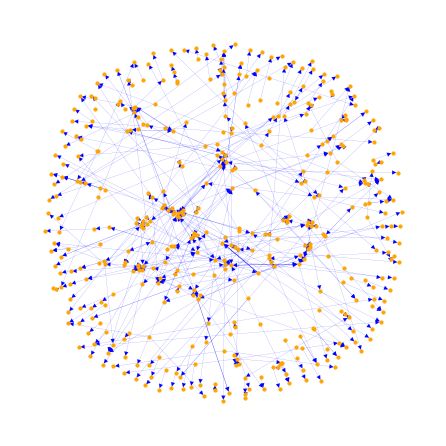

In [112]:
#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph = tripcount_test_df
edge_weight = trips_graph['edge_weight']
wg = nx.DiGraph()
wg.add_weighted_edges_from(edge_weight)
weights = [wg[u][v]['weight'] for u,v in wg.edges()]
myInt = 10
weights[:] = [x / myInt for x in weights]
plt.figure(2,figsize=(6,6))
nx.draw(wg, node_size=10, with_labels=False,node_color='orange', width = weights, edge_color='blue')
plt.show()

### 00:00:00 - 04:00:00 -> Weekend (Sunday)

In [113]:
#Calculate the number of trips for start station to end station
tripcount_test_df1 = df_test_time1_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df1.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df1['edge_weight'] = list(zip(tripcount_test_df1['start_station_name'], tripcount_test_df1['end_station_name'],tripcount_test_df1['Number of Trips']))
tripcount_test_df1.head(5)

start_station_name            end_station_name  \
381    Clinton Ave & Flushing Ave   Washington Ave & Park Ave   
630               E 58 St & 3 Ave             E 58 St & 3 Ave   
883         Lafayette St & E 8 St  Division St & Bowery (old)   
357   Central Park West & W 82 St             E 51 St & 1 Ave   
1294              W 22 St & 8 Ave            W 22 St & 10 Ave   

      start_station_latitude  start_station_longitude  end_station_latitude  \
381                40.697940               -73.969868             40.696102   
630                40.760958               -73.967245             40.760958   
883                40.730207               -73.991026             40.714131   
357                40.782593               -73.971211             40.754557   
1294               40.744751               -73.999154             40.746920   

      end_station_longitude  Number of Trips  \
381              -73.967510                5   
630              -73.967245                4   
883              -73.997047                4   
357              -73.965930                3   
1294             -74.004519                3   

                                            edge_weight  
381   (Clinton Ave & Flushing Ave, Washington Ave & ...  
630               (E 58 St & 3 Ave, E 58 St & 3 Ave, 4)  
883   (Lafayette St & E 8 St, Division St & Bowery (...  
357   (Central Park West & W 82 St, E 51 St & 1 Ave, 3)  
1294             (W 22 St & 8 Ave, W 22 St & 10 Ave, 3)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


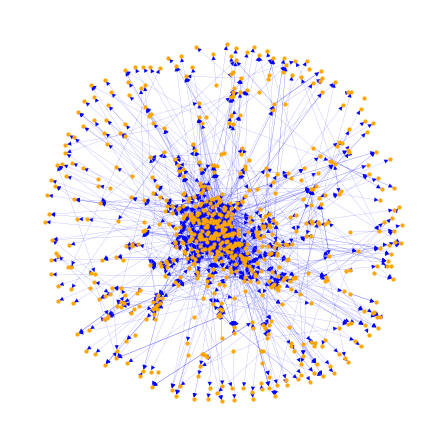

In [114]:
#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph1 = tripcount_test_df1
edge_weight1 = trips_graph1['edge_weight']
wg1 = nx.DiGraph()
wg1.add_weighted_edges_from(edge_weight1)
weights1 = [wg1[u][v]['weight'] for u,v in wg1.edges()]
myInt = 10
weights1[:] = [x / myInt for x in weights1]
plt.figure(2,figsize=(6,6))
nx.draw(wg1, node_size=10, with_labels=False,node_color='orange', width = weights1, edge_color='blue')
plt.show()

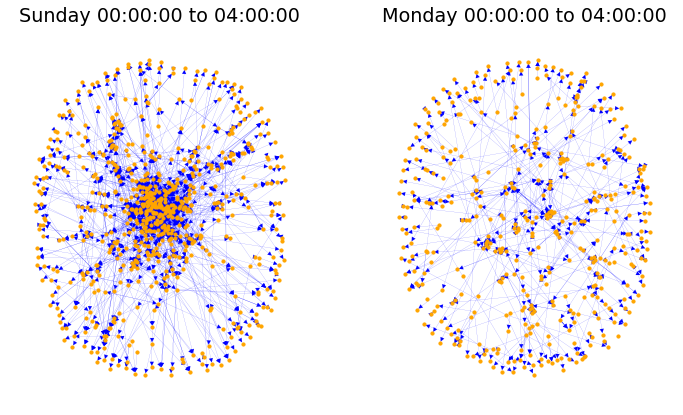

In [115]:
plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 00:00:00 to 04:00:00')
nx.draw(wg1, node_size=10, with_labels=False,node_color='orange', width = weights1, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 00:00:00 to 04:00:00')
nx.draw(wg, node_size=10, with_labels=False,node_color='orange', width = weights, edge_color='blue', ax = ax)

### 04:00:00 - 08:00:00 -> Weekday (Monday) 
### 04:00:00 - 08:00:00 -> Weekend (Sunday)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


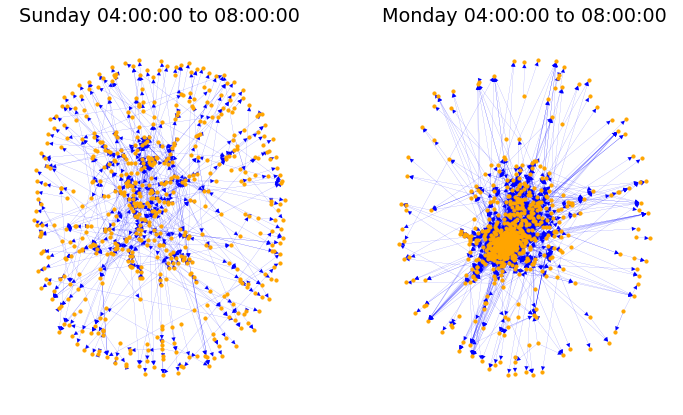

In [116]:
#Calculate the number of trips for start station to end station
tripcount_test_df2 = df_test_time2_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df2.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df2['edge_weight'] = list(zip(tripcount_test_df2['start_station_name'], tripcount_test_df2['end_station_name'],tripcount_test_df2['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph2 = tripcount_test_df2
edge_weight2 = trips_graph2['edge_weight']
wg2 = nx.DiGraph()
wg2.add_weighted_edges_from(edge_weight2)
weights2 = [wg2[u][v]['weight'] for u,v in wg2.edges()]
myInt = 10
weights2[:] = [x / myInt for x in weights2]

#Calculate the number of trips for start station to end station
tripcount_test_df3 = df_test_time2_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df3.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df3['edge_weight'] = list(zip(tripcount_test_df3['start_station_name'], tripcount_test_df3['end_station_name'],tripcount_test_df3['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph3 = tripcount_test_df3
edge_weight3 = trips_graph3['edge_weight']
wg3 = nx.DiGraph()
wg3.add_weighted_edges_from(edge_weight3)
weights3 = [wg3[u][v]['weight'] for u,v in wg3.edges()]
myInt = 10
weights3[:] = [x / myInt for x in weights3]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 04:00:00 to 08:00:00')
nx.draw(wg3, node_size=10, with_labels=False,node_color='orange', width = weights3, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 04:00:00 to 08:00:00')
nx.draw(wg2, node_size=10, with_labels=False,node_color='orange', width = weights2, edge_color='blue', ax = ax)

### 08:00:00 - 12:00:00 -> Weekday (Monday)
### 08:00:00 - 12:00:00 -> Weekend (Sunday)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


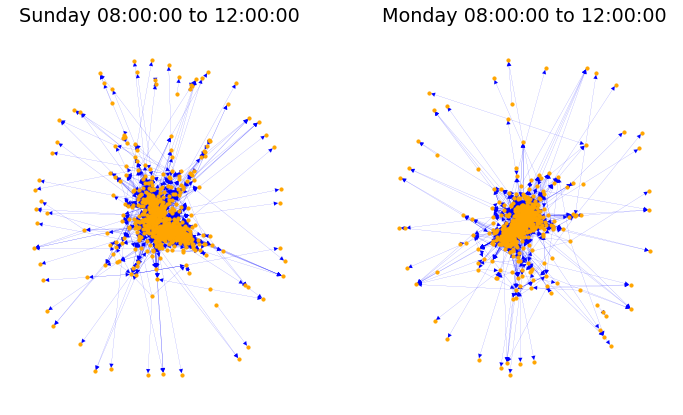

In [117]:
#Calculate the number of trips for start station to end station
tripcount_test_df4 = df_test_time3_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df4.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df4['edge_weight'] = list(zip(tripcount_test_df4['start_station_name'], tripcount_test_df4['end_station_name'],tripcount_test_df4['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph4 = tripcount_test_df4
edge_weight4 = trips_graph4['edge_weight']
wg4 = nx.DiGraph()
wg4.add_weighted_edges_from(edge_weight4)
weights4 = [wg4[u][v]['weight'] for u,v in wg4.edges()]
myInt = 10
weights4[:] = [x / myInt for x in weights4]

#Calculate the number of trips for start station to end station
tripcount_test_df5 = df_test_time3_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df5.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df5['edge_weight'] = list(zip(tripcount_test_df5['start_station_name'], tripcount_test_df5['end_station_name'],tripcount_test_df5['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph5 = tripcount_test_df5
edge_weight5 = trips_graph5['edge_weight']
wg5 = nx.DiGraph()
wg5.add_weighted_edges_from(edge_weight5)
weights5 = [wg5[u][v]['weight'] for u,v in wg5.edges()]
myInt = 10
weights5[:] = [x / myInt for x in weights5]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 08:00:00 to 12:00:00')
nx.draw(wg5, node_size=10, with_labels=False,node_color='orange', width = weights5, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 08:00:00 to 12:00:00')
nx.draw(wg4, node_size=10, with_labels=False,node_color='orange', width = weights4, edge_color='blue', ax = ax)

### 12:00:00 - 16:00:00 -> Weekday (Monday)
### 12:00:00 - 16:00:00 -> Weekend (Sunday)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


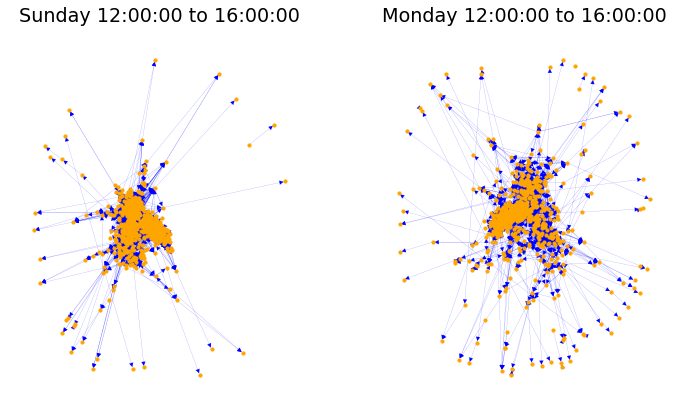

In [118]:
#Calculate the number of trips for start station to end station
tripcount_test_df6 = df_test_time4_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df6.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df6['edge_weight'] = list(zip(tripcount_test_df6['start_station_name'], tripcount_test_df6['end_station_name'],tripcount_test_df6['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph6 = tripcount_test_df6
edge_weight6 = trips_graph6['edge_weight']
wg6 = nx.DiGraph()
wg6.add_weighted_edges_from(edge_weight6)
weights6 = [wg6[u][v]['weight'] for u,v in wg6.edges()]
myInt = 10
weights6[:] = [x / myInt for x in weights6]

#Calculate the number of trips for start station to end station
tripcount_test_df7 = df_test_time4_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df7.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df7['edge_weight'] = list(zip(tripcount_test_df7['start_station_name'], tripcount_test_df7['end_station_name'],tripcount_test_df7['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph7 = tripcount_test_df7
edge_weight7 = trips_graph7['edge_weight']
wg7 = nx.DiGraph()
wg7.add_weighted_edges_from(edge_weight7)
weights7 = [wg7[u][v]['weight'] for u,v in wg7.edges()]
myInt = 10
weights7[:] = [x / myInt for x in weights7]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 12:00:00 to 16:00:00')
nx.draw(wg7, node_size=10, with_labels=False,node_color='orange', width = weights7, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 12:00:00 to 16:00:00')
nx.draw(wg6, node_size=10, with_labels=False,node_color='orange', width = weights6, edge_color='blue', ax = ax)

### 16:00:00 - 20:00:00 -> Weekday (Monday)
### 16:00:00 - 20:00:00 -> Weekend (Sunday)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


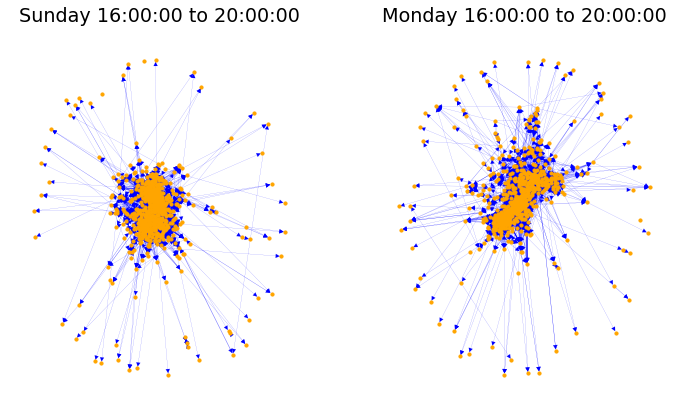

In [119]:
#Calculate the number of trips for start station to end station
tripcount_test_df8 = df_test_time5_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df8.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df8['edge_weight'] = list(zip(tripcount_test_df8['start_station_name'], tripcount_test_df8['end_station_name'],tripcount_test_df8['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph8 = tripcount_test_df8
edge_weight8 = trips_graph8['edge_weight']
wg8 = nx.DiGraph()
wg8.add_weighted_edges_from(edge_weight8)
weights8 = [wg8[u][v]['weight'] for u,v in wg8.edges()]
myInt = 10
weights8[:] = [x / myInt for x in weights8]

#Calculate the number of trips for start station to end station
tripcount_test_df9 = df_test_time5_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df9.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df9['edge_weight'] = list(zip(tripcount_test_df9['start_station_name'], tripcount_test_df9['end_station_name'],tripcount_test_df9['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph9 = tripcount_test_df9
edge_weight9 = trips_graph9['edge_weight']
wg9 = nx.DiGraph()
wg9.add_weighted_edges_from(edge_weight9)
weights9 = [wg9[u][v]['weight'] for u,v in wg9.edges()]
myInt = 10
weights9[:] = [x / myInt for x in weights9]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 16:00:00 to 20:00:00')
nx.draw(wg9, node_size=10, with_labels=False,node_color='orange', width = weights9, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 16:00:00 to 20:00:00')
nx.draw(wg8, node_size=10, with_labels=False,node_color='orange', width = weights8, edge_color='blue', ax = ax)

### 20:00:00 - 24:00:00 -> Weekday (Monday)
### 20:00:00 - 24:00:00 -> Weekend (Sunday)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


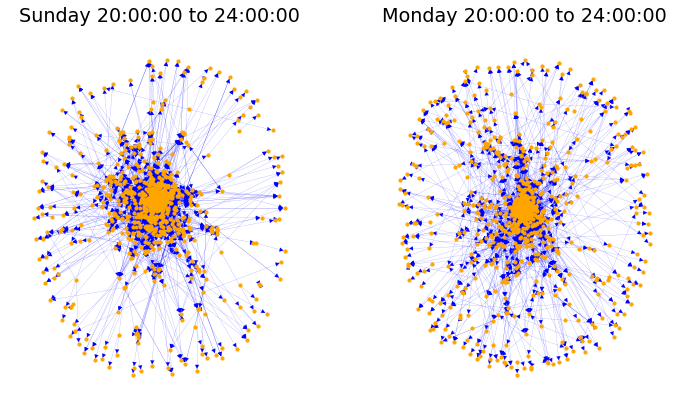

In [120]:
#Calculate the number of trips for start station to end station
tripcount_test_df10 = df_test_time6_wk.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df10.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df10['edge_weight'] = list(zip(tripcount_test_df10['start_station_name'], tripcount_test_df10['end_station_name'],tripcount_test_df10['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph10 = tripcount_test_df10
edge_weight10 = trips_graph10['edge_weight']
wg10 = nx.DiGraph()
wg10.add_weighted_edges_from(edge_weight10)
weights10 = [wg10[u][v]['weight'] for u,v in wg10.edges()]
myInt = 10
weights10[:] = [x / myInt for x in weights10]

#Calculate the number of trips for start station to end station
tripcount_test_df11 = df_test_time6_wkend.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_test_df11.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_test_df11['edge_weight'] = list(zip(tripcount_test_df11['start_station_name'], tripcount_test_df11['end_station_name'],tripcount_test_df11['Number of Trips']))

#Construct a directed network graph based on the above edges & edge weights
import networkx as nx
trips_graph11 = tripcount_test_df11
edge_weight11 = trips_graph11['edge_weight']
wg11 = nx.DiGraph()
wg11.add_weighted_edges_from(edge_weight11)
weights11 = [wg11[u][v]['weight'] for u,v in wg11.edges()]
myInt = 10
weights11[:] = [x / myInt for x in weights11]

plt.subplot(1,2,1)
ax = plt.gca()
ax.set_title('Sunday 20:00:00 to 24:00:00')
nx.draw(wg11, node_size=10, with_labels=False,node_color='orange', width = weights11, edge_color='blue', ax = ax)
plt.subplot(1,2,2)
ax = plt.gca()
ax.set_title('Monday 20:00:00 to 24:00:00')
nx.draw(wg10, node_size=10, with_labels=False,node_color='orange', width = weights10, edge_color='blue', ax = ax)

In [121]:
#Calculate the number of trips for start station to end station
tripcount_df = df.groupby(['start_station_name','end_station_name','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude']).size().reset_index(name = 'Number of Trips')
tripcount_df.sort_values('Number of Trips', ascending = False, inplace = True)
tripcount_df['edge_weight'] = list(zip(tripcount_df['start_station_name'], tripcount_df['end_station_name'],tripcount_df['Number of Trips']))
tripcount_df.head(5)

start_station_name          end_station_name  start_station_latitude  \
32823   E 7 St & Avenue A  Cooper Square & Astor Pl               40.726218   
15043  Broadway & W 60 St          11 Ave & W 59 St               40.769155   
27588  E 32 St & Park Ave           E 33 St & 1 Ave               40.745712   
59670     W 21 St & 6 Ave           9 Ave & W 22 St               40.741740   
1919     11 Ave & W 41 St           8 Ave & W 33 St               40.760301   

       start_station_longitude  end_station_latitude  end_station_longitude  \
32823               -73.983799             40.729515             -73.990753   
15043               -73.981918             40.771497             -73.990460   
27588               -73.981948             40.743227             -73.974498   
59670               -73.994156             40.745497             -74.001971   
1919                -73.998842             40.751551             -73.993934   

       Number of Trips                                        edge_weight  
32823              109  (E 7 St & Avenue A, Cooper Square & Astor Pl, ...  
15043               96         (Broadway & W 60 St, 11 Ave & W 59 St, 96)  
27588               90          (E 32 St & Park Ave, E 33 St & 1 Ave, 90)  
59670               87             (W 21 St & 6 Ave, 9 Ave & W 22 St, 87)  
1919                77            (11 Ave & W 41 St, 8 Ave & W 33 St, 77)

### Network Structure for Month of Dec 2019

In [122]:
#Construct an undirected network graph based on the above edges
import networkx as nx
trips_graph = tripcount_df
edge_weight = trips_graph['edge_weight']
wg = nx.DiGraph()
wg.add_weighted_edges_from(edge_weight)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


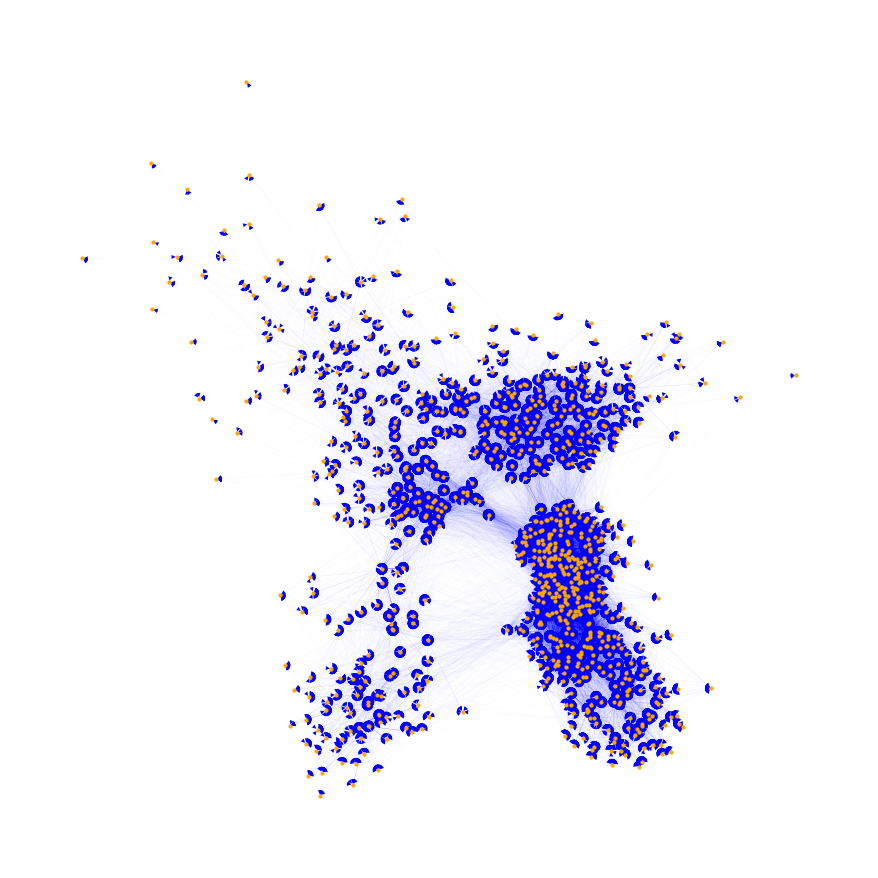

In [123]:
weights = [wg[u][v]['weight'] for u,v in wg.edges()]
myInt = 300
weights[:] = [x / myInt for x in weights]
plt.figure(3,figsize=(12,12))
nx.draw(wg, node_size=10, with_labels=False,node_color='orange', width = weights, edge_color='blue')
plt.show()

### Having Completed EDA & Plotting Basic Network Graphs using networkx packpage, we save our data sets for the 6 seperate time frames into '.CSV' files for community detection and centrality metrics calculation

In [124]:
# df_test_time1_wk to df_test_time6_wk - 6 time slots of the week are stored as .CSV files
df_test_time1_wk.to_csv('Clean_data_files_for_Community/time1_wk.csv')
df_test_time2_wk.to_csv('Clean_data_files_for_Community/time2_wk.csv')
df_test_time3_wk.to_csv('Clean_data_files_for_Community/time3_wk.csv')
df_test_time4_wk.to_csv('Clean_data_files_for_Community/time4_wk.csv')
df_test_time5_wk.to_csv('Clean_data_files_for_Community/time5_wk.csv')
df_test_time6_wk.to_csv('Clean_data_files_for_Community/time6_wk.csv')

# df_test_time1_wkend to df_test_time6_wkend - 6 time slots of the weekend are stored as .CSV files
df_test_time1_wkend.to_csv('Clean_data_files_for_Community/time1_wkend.csv')
df_test_time2_wkend.to_csv('Clean_data_files_for_Community/time2_wkend.csv')
df_test_time3_wkend.to_csv('Clean_data_files_for_Community/time3_wkend.csv')
df_test_time4_wkend.to_csv('Clean_data_files_for_Community/time4_wkend.csv')
df_test_time5_wkend.to_csv('Clean_data_files_for_Community/time5_wkend.csv')
df_test_time6_wkend.to_csv('Clean_data_files_for_Community/time6_wkend.csv')